## **Business Case: Aerofit - Descriptive Statistics & Probability**
 

**About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

 **Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1.   Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2.   For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

 **Dataset**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:
Product Purchased:	KP281, KP481, or KP781

*   **Age:**	In years
*   **Gender:**	Male/Female
*   **Education:**	In years
*   **MaritalStatus:**	Single or partnered
*   **Usage:**	The average number of times the customer plans to use the treadmill each week.
*   **Income:**	Annual income (in $)
*   **Fitness:** Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
*   **Miles:**	The average number of miles the customer expects to walk/run each week

 **Product Portfolio:**

* The KP281 is an entry-level treadmill that sells for $1,500.

* The KP481 is for mid-level runners that sell for $1,750.

* The KP781 treadmill is having advanced features that sell for $2,500.

# 1. Defining Problem Statement and Analysing basic metrics:
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore", FutureWarning)

In [5]:
df = pd.read_csv('aerofit_treadmill.csv')

In [6]:
# default head displays 5 rows
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [7]:
#  default tail displays 5 rows
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [8]:
# Shape of datset
df.shape

(180, 9)

In [9]:
# Column names
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [10]:
# Print the datatypes of columns
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

**Observation:**
1. The Dataset consists of 180 rows and 9 columns
2. Numerical data type : Age,Education,Usage,Fitness,Income and Miles
3. Object data type : Product,Gender,MartialStatus

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# **Statistical summary:**

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [15]:
df.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


**Observations:**
1. **Age** - The age range of customers spans from 18 to 50 year, with an average age of 29 years.
2. **Education** - Customer education levels vary between 12 and 21 years, with an average education duration of 16 years.
3. **Usage** - Customers intend to utilize the product anywhere from 2 to 7 times per week, with an average frequency of 3 times per week.
4. **Fitness** - On average, customers have rated their fitness at 3 on a 5-point scale, reflecting a moderate level of fitness.
5. **Income** - The annual income of customers falls within the range of 30,000 to 100,000, with an average income of approximately 54,000.
6. **Miles** - Customers' weekly running goals range from 21 to 360 miles, with an average target of 103 miles per week.

In [17]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [18]:
df[df.duplicated()].any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

**Observations:**
* There are no missing value in the dataset.
* There are no duplicated values in the dataset.

**Descriptive Statistics of Numeric columns:**

In [21]:
for col in df.select_dtypes(np.number):
    mean = np.round(df[col].mean(),2)
    sd = np.round(df[col].std(),2)
    median = np.round(df[col].median(),2)
    minimum = df[col].min()
    maximum = df[col].max()
    q3 = np.percentile(df['Income'],75)
    q1 = np.percentile(df['Income'], 25)
    IQR = q3 - q1
    Upper = q3 + 1.5 * IQR
    Lower = q1 - 1.5 * IQR
    print(f"-----DESCRIPTIVE STATISTICS OF {col} COLUMN--------")
    print(f"Mean:{mean}")
    print(f"Standard deviation:{sd}")
    print(f"Median:{median}")
    print(f"Minimum:{minimum}")
    print(f"Maximum:{maximum}")
    print(f"25 Percentile:{q1}")
    print(f"75 Percentile:{q3}")
    print(f"Inter Quartile Range:{IQR}")
    print(f"Upper bound:{Upper}")
    print(f"Lower bound:{Lower}")
    print()
    
    

-----DESCRIPTIVE STATISTICS OF Age COLUMN--------
Mean:28.79
Standard deviation:6.94
Median:26.0
Minimum:18
Maximum:50
25 Percentile:44058.75
75 Percentile:58668.0
Inter Quartile Range:14609.25
Upper bound:80581.875
Lower bound:22144.875

-----DESCRIPTIVE STATISTICS OF Education COLUMN--------
Mean:15.57
Standard deviation:1.62
Median:16.0
Minimum:12
Maximum:21
25 Percentile:44058.75
75 Percentile:58668.0
Inter Quartile Range:14609.25
Upper bound:80581.875
Lower bound:22144.875

-----DESCRIPTIVE STATISTICS OF Usage COLUMN--------
Mean:3.46
Standard deviation:1.08
Median:3.0
Minimum:2
Maximum:7
25 Percentile:44058.75
75 Percentile:58668.0
Inter Quartile Range:14609.25
Upper bound:80581.875
Lower bound:22144.875

-----DESCRIPTIVE STATISTICS OF Fitness COLUMN--------
Mean:3.31
Standard deviation:0.96
Median:3.0
Minimum:1
Maximum:5
25 Percentile:44058.75
75 Percentile:58668.0
Inter Quartile Range:14609.25
Upper bound:80581.875
Lower bound:22144.875

-----DESCRIPTIVE STATISTICS OF Income CO

# **2 Non-Graphical Analysis: Value counts and unique attributes**

In [23]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

**ANALYSIS**
Aerofit produces three treadmill models: KP281,KP481 and KP781

In [25]:
df['Product'].nunique()

3

In [26]:
product_count = round(df['Product'].value_counts(normalize = True) * 100 ,2)
product_count

Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: proportion, dtype: float64

**Insights:**
1. Among the users, 44.44% prefer using **KP281** treadmill
2. 33.33% use **KP481** treadmill
3. 22.22% use **KP781** treadmill

In [28]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [29]:
df['Age'].nunique()

32

In [30]:
age_count = df['Age'].value_counts(normalize = True) * 100
round(age_count,2)

Age
25    13.89
23    10.00
24     6.67
26     6.67
28     5.00
35     4.44
33     4.44
30     3.89
38     3.89
21     3.89
22     3.89
27     3.89
31     3.33
34     3.33
29     3.33
20     2.78
40     2.78
32     2.22
19     2.22
48     1.11
37     1.11
45     1.11
47     1.11
46     0.56
50     0.56
18     0.56
44     0.56
43     0.56
41     0.56
39     0.56
36     0.56
42     0.56
Name: proportion, dtype: float64

In [31]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [32]:
df['Gender'].nunique()

2

In [33]:
gender_count = df['Gender'].value_counts(normalize = True) * 100
round(gender_count,2)

Gender
Male      57.78
Female    42.22
Name: proportion, dtype: float64

In [34]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [35]:
df['Usage'].nunique()

6

In [36]:
usage_count = df['Usage'].value_counts(normalize = True) * 100
round(usage_count,2)

Usage
3    38.33
4    28.89
2    18.33
5     9.44
6     3.89
7     1.11
Name: proportion, dtype: float64

In [37]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [38]:
df['MaritalStatus'].nunique()

2

In [39]:
martialstatus_count = df['MaritalStatus'].value_counts(normalize = True) * 100
round(martialstatus_count,2)

MaritalStatus
Partnered    59.44
Single       40.56
Name: proportion, dtype: float64

# **Handling outliers:**

* **Income column**

In [42]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [43]:
q3 = np.percentile(df['Income'],75)
q1 = np.percentile(df['Income'], 25)
print(f"Quartile3 (75) value has:{q3}")
print(f"Quartile1 (25) value has:{q1}")
IQR = q3 - q1
print(f"Inter Quartile Range value has:{IQR}")
Upper = q3 + 1.5 * IQR
Lower = q1 - 1.5 * IQR
Median = df['Income'].median()
print(f"Upper Bound value:{Upper}")
print(f"Lower Bound value:{Lower}")
print(f"Median value:{Median}")

Quartile3 (75) value has:58668.0
Quartile1 (25) value has:44058.75
Inter Quartile Range value has:14609.25
Upper Bound value:80581.875
Lower Bound value:22144.875
Median value:50596.5


After handling outliers 


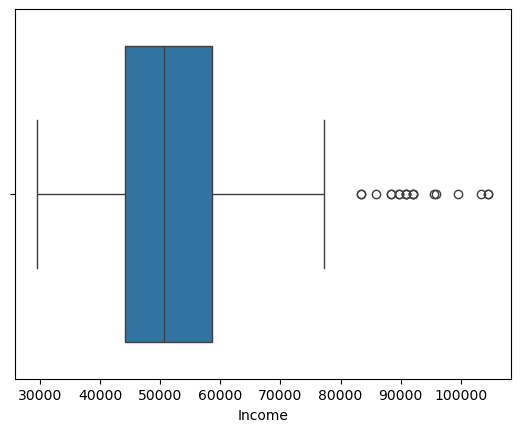

In [44]:
print("After handling outliers ")
sns.boxplot(data = df,x = 'Income')
plt.show()

In [45]:
round(len(df.loc[df['Income'] > Upper])/len(df) * 100 , 3)

10.556

**Observations:**

* As we can observe that there are outliers in the **Income** column
* All values > 80581.875(Upper bound) are outliers present
  
**Analysis:**

* 10.5% values in income column are outliers.
* These are some valuable insights for customer profiling

* **Miles column:**

In [48]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [49]:
q3 = np.percentile(df['Miles'],75)
q1 = np.percentile(df['Miles'], 25)
print(f"Quartile3 (75) value has:{q3}")
print(f"Quartile1 (25) value has:{q1}")
IQR = q3 - q1
print(f"Inter Quartile Range value has:{IQR}")
Upper = q3 + 1.5 * IQR
Lower = q1 - 1.5 * IQR
Median = df['Miles'].median()
print(f"Upper Bound value:{Upper}")
print(f"Lower Bound value:{Lower}")
print(f"Median value:{Median}")
lower_percentile = np.percentile(df[col], 5)
upper_percentile = np.percentile(df[col], 95)    
print(f"lower percentile (5):{lower_percentile}")
print(f"Upper percentile(95):{upper_percentile}")
df[col] = np.clip(df[col], lower_percentile, upper_percentile)

Quartile3 (75) value has:114.75
Quartile1 (25) value has:66.0
Inter Quartile Range value has:48.75
Upper Bound value:187.875
Lower Bound value:-7.125
Median value:94.0
lower percentile (5):47.0
Upper percentile(95):200.0


After removing 5 and 95 percentile values


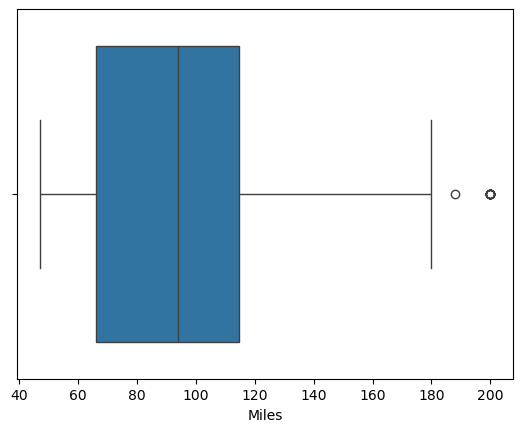

In [50]:
print("After removing 5 and 95 percentile values")
sns.boxplot(data = df ,x = 'Miles')
plt.show()

In [51]:
round(len(df.loc[df['Miles'] > Upper])/len(df) * 100 , 3)

7.222

**Observations:**

* As we can observe that there are outliers in the **Miles** column
* All values > 187.875(Upper bound) are outliers present
  
**Analysis:**
* 7.2% values in miles column are outliers.
* These are some valuable insights for customer profiling

**Outlier detection using Z score:**
1. Outlier detection using the Z-score involves identifying values that deviate significantly from the mean of a dataset.
2. The Z-score measures how many standard deviations a value is away from the mean.
3. Calculate the Z-score: The formula for Z-score is:
   𝑍 = (𝑋 − 𝜇) / 𝜎 
   Where:X is the individual data point,
         μ is the mean of the data,
         σ is the standard deviation of the data.



In [54]:
outliers = {}
for col in df.select_dtypes(include = np.number):
    zscore = np.abs((df[col] - df[col].mean()))/df[col].std()
    col_outliers = df[zscore > 3][col]
    outliers[col] = col_outliers
for col,outlier_values in outliers.items():
    print(f"Outliers \n{col} column")
    print(outlier_values)
    print()


Outliers 
Age column
79    50
Name: Age, dtype: int64

Outliers 
Education column
157    21
161    21
175    21
Name: Education, dtype: int64

Outliers 
Usage column
163    7
166    7
Name: Usage, dtype: int64

Outliers 
Fitness column
Series([], Name: Fitness, dtype: int64)

Outliers 
Income column
168    103336
174    104581
178    104581
Name: Income, dtype: int64

Outliers 
Miles column
Series([], Name: Miles, dtype: int64)



**Insights:**

* There are no outliers present in **Fitness** suggests that all customers fall within a reasonable range.
* The outliers in **Income** indicate that a few customers have much higher incomes
* The outliers in **Miles** suggest that few customers expect to walk or run significantly more miles per week

In [56]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [57]:
# To observe customer purchase behaviour
df['age_group'] = pd.cut(df['Age'], bins=[17, 29, 39, 50], labels=['Young', 'Middle-aged', 'Old'])

In [58]:
df['age_group'].value_counts()

age_group
Young          113
Middle-aged     50
Old             17
Name: count, dtype: int64

In [59]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [60]:
df['Income-group'] = pd.cut(df['Income'] , bins = [29000,50000,75000,105000] , labels = ['Low','Medium','High'])

In [61]:
df['Income-group'].value_counts()

Income-group
Low       83
Medium    76
High      21
Name: count, dtype: int64

In [62]:
df['miles_group'] = pd.cut(df['Miles'], bins=[47, 80, 90, 200], labels=['Light activity', 'Moderate Activity', 'Active Lifestyle'])


In [63]:
df['miles_group'].value_counts()

miles_group
Active Lifestyle     93
Light activity       43
Moderate Activity    27
Name: count, dtype: int64

In [64]:
bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']

df['edu_group'] = pd.cut(df['Education'],bins = bin_range2,labels = bin_labels2)

In [65]:
df['edu_group'].value_counts()

edu_group
Higher Education       112
Secondary Education     65
Primary Education        3
Name: count, dtype: int64

# **Visual Analysis - Univariate**

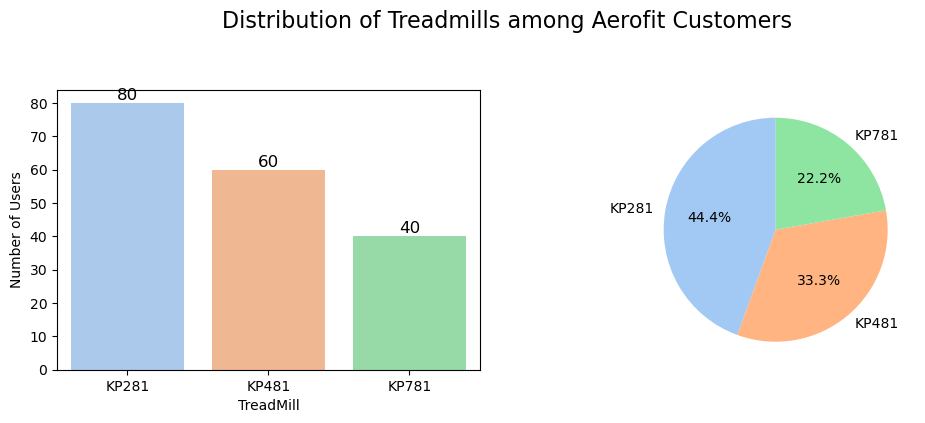

In [67]:
plt.figure(figsize=(12, 8))
# First subplot (countplot)
plt.subplot(2, 2, 1)
ax = sns.countplot(data=df, x='Product', palette='pastel')
plt.xlabel('TreadMill')
plt.ylabel('Number of Users')
# Add values on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 1, f'{int(p.get_height())}', 
            ha='center', fontsize=12)
# Second subplot (pie chart)
plt.subplot(2, 2, 2)
product_counts = df['Product'].value_counts()
# Get pastel colors from Seaborn
pie_colors = sns.color_palette("pastel", len(product_counts))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=90, colors=pie_colors)
plt.suptitle("Distribution of Treadmills among Aerofit Customers", fontsize=16)
plt.show()


**Insights:**
1. Among the users, 44.4% prefer using KP281 treadmill,33.3% for KP481 treadmill and 22.2% favor KP781 treadmill
2. KP281,being an entry-level and more affordable treadmill and preferred choice among majority of customers
3. KP481,ideal fit for mid-level runners and its excellent value-for-money offering   
4. KP781,is chosen by only 22.2% of customers for being more advanced and costlier

**Recommendations:**
1. Empahasize the budget-friendly nature of KP281 to attract more customers
2. Provide some special offers or discounts to further entice customers looking for a cost-effective option
3. Engage with fitness communities in online to showcase KP281's appeal to beginners
4. Compare the competitive pricing and features of KP481 that make it a cost-effetcive choice for customers
5. Emphasize the unique features of KP781 to justify its higher price

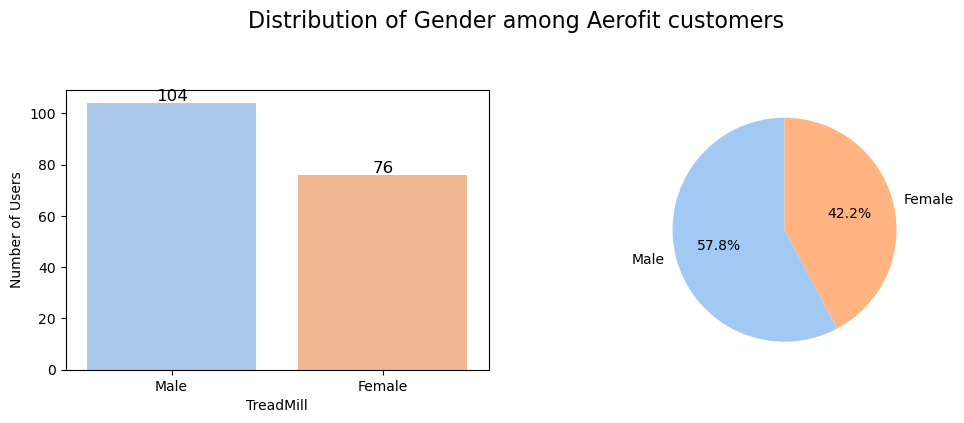

In [69]:
plt.figure(figsize=(12, 8))
# First subplot (countplot)
plt.subplot(2, 2, 1)
ax = sns.countplot(data=df, x='Gender', palette='pastel')
plt.xlabel('TreadMill')
plt.ylabel('Number of Users')
# Add values on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 1, f'{int(p.get_height())}', 
            ha='center', fontsize=12)
# Second subplot (pie chart)
plt.subplot(2, 2, 2)
product_counts = df['Gender'].value_counts()
# Get pastel colors from Seaborn
pie_colors = sns.color_palette("pastel", len(product_counts))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=90, colors=pie_colors)
plt.suptitle("Distribution of Gender among Aerofit customers",fontsize=16)
plt.show()


**Insights:**
* Aerofit has 57.8% male and 42.2% female customers

**Recommendations:**
1. Showcase the female-friendly features and benefits of Aerofit treadmills to attract more female customers
2. Show diverse selection of treadmill models to various fitness levels and preferences

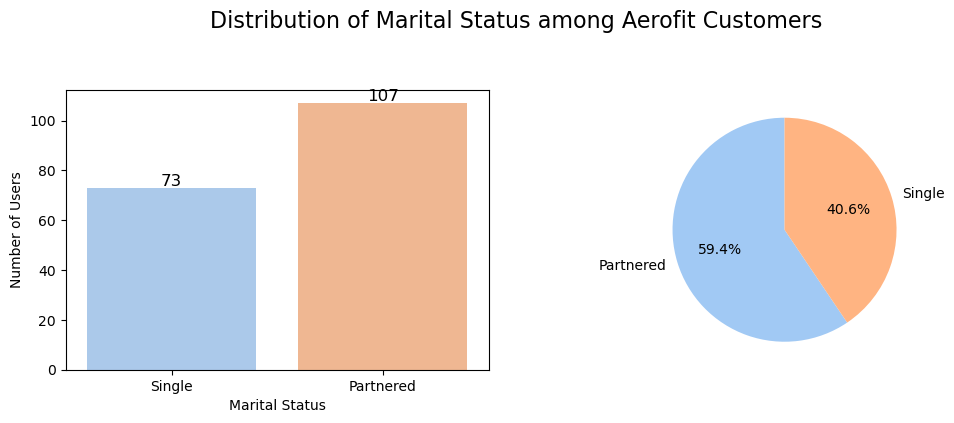

In [71]:
plt.figure(figsize=(12, 8))
# First subplot (countplot)
plt.subplot(2, 2, 1)
ax = sns.countplot(data=df, x='MaritalStatus', palette='pastel')  # Corrected the column name here
plt.xlabel('Marital Status')
plt.ylabel('Number of Users')
# Add values on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 1, f'{int(p.get_height())}', 
            ha='center', fontsize=12)
# Second subplot (pie chart)
plt.subplot(2, 2, 2)
product_counts = df['MaritalStatus'].value_counts()  
# Get pastel colors from Seaborn
pie_colors = sns.color_palette("pastel", len(product_counts))
# Plot pie chart
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=90, colors=pie_colors)
plt.suptitle("Distribution of Marital Status among Aerofit Customers", fontsize=16)
plt.show()

**Insight:**
* 40.6% of Aerofit customers are single,while remaining 59.4% are partnered

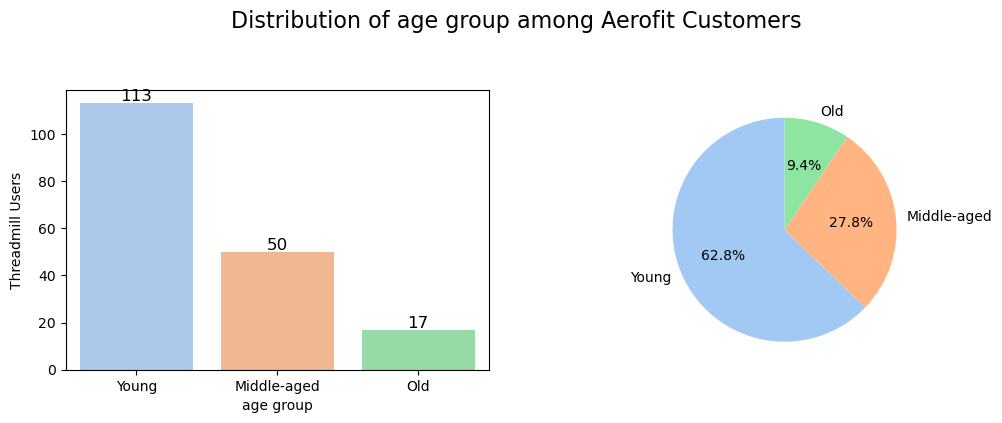

In [73]:
plt.figure(figsize=(12, 8))
# First subplot (countplot)
plt.subplot(2, 2, 1)
ax = sns.countplot(data=df, x='age_group', palette='pastel')  # Corrected the column name here
plt.xlabel('age group')
plt.ylabel('Threadmill Users')
# Add values on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 1, f'{int(p.get_height())}', 
            ha='center', fontsize=12)
# Second subplot (pie chart)
plt.subplot(2, 2, 2)
product_counts = df['age_group'].value_counts()  
# Get pastel colors from Seaborn
pie_colors = sns.color_palette("pastel", len(product_counts))
# Plot pie chart
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=90, colors=pie_colors)
plt.suptitle("Distribution of age group among Aerofit Customers", fontsize=16)
plt.show()

**Insight:**
1. 62.8% of the Aerofit customers are under age group of youth(18-29)
2. 27.8% of middle aged(30-39) users prefer to use the Aerofit Treadmills
3. 9.4% of old age(40-50) group prefer purchasing Aerofit treadmills
4. There are very few users in the age group(40-50),and the probability of them buying Aerofit treadmills is significantly low
5. The majority of Aerofit customers belong to Youth(18-30) and there is a high probability of them purchasing Aerofit treadmills

**Recommendations:**
* Personalised assistance to help old age to select the ideal treadmill model,providing them with tools to maintain an active and healthy lifestyle.


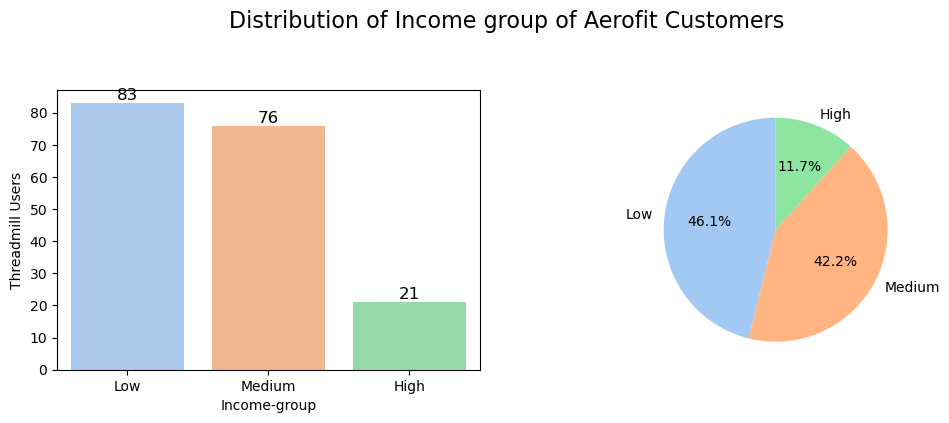

In [75]:
plt.figure(figsize=(12, 8))
# First subplot (countplot)
plt.subplot(2, 2, 1)
ax = sns.countplot(data=df, x='Income-group', palette='pastel')  # Corrected the column name here
plt.xlabel('Income-group')
plt.ylabel('Threadmill Users')
# Add values on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 1, f'{int(p.get_height())}', 
            ha='center', fontsize=12)
# Second subplot (pie chart)
plt.subplot(2, 2, 2)
product_counts = df['Income-group'].value_counts()  
# Get pastel colors from Seaborn
pie_colors = sns.color_palette("pastel", len(product_counts))
# Plot pie chart
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=90, colors=pie_colors)
plt.suptitle("Distribution of Income group of Aerofit Customers", fontsize=16)
plt.show()

**Insights:**
1. 11.7% belongs to High income group
2. 46.1% belongs to low income group
3. 42.2% belongs to medium income group
4. The majority of Aerofit customers fall within the income range 40000-60000, and there is a high probability of them purchasing Aerofit threadmills
5. Customers with income greater than 80000 have a significantly low probability of buying Aerofit treadmills.

**Recommendations:**
* Offer Personalized consultations and extend warranties to attract and reward this income group

**Distribution of Education:**

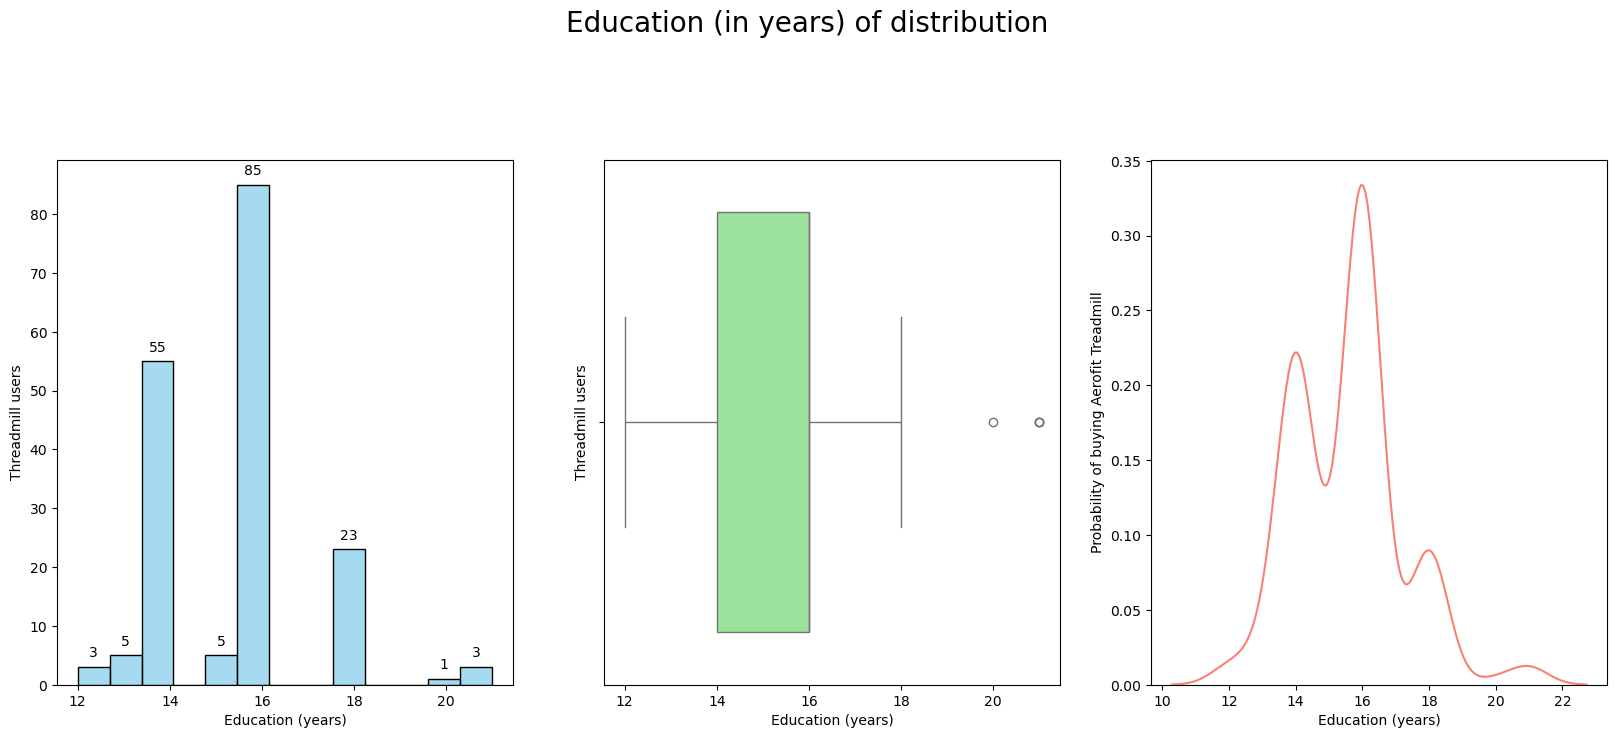

In [78]:
plt.figure(figsize=(20, 15))
# First plot: Histogram with a specific color
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='Education', color='skyblue')
plt.xlabel("Education (years)")
plt.ylabel("Threadmill users")
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:  # Only annotate if the height is greater than 0
        plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                           xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
# Second plot: Boxplot with a different color
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Education', color='lightgreen')
plt.xlabel("Education (years)")
plt.ylabel("Threadmill users")
# Third plot: Another Histogram with a different color
plt.subplot(2, 3, 3)
sns.kdeplot(data=df, x='Education', color='salmon')
plt.xlabel("Education (years)")
plt.ylabel("Probability of buying Aerofit Treadmill")
plt.suptitle("Education (in years) of distribution", fontsize=20)
plt.show()

Categorizing the values in education column in 3 different buckets:
1. Primary Education: upto 12
2. Secondary Education: 13 to 15
3. Higher Education: 16 and above

**Insights:**
1. Customers with education greater than 18 years have low probability of purchasing the Aerofit treadmill
2. Customers with 16 years of education

**Distribution of Fitness level:**

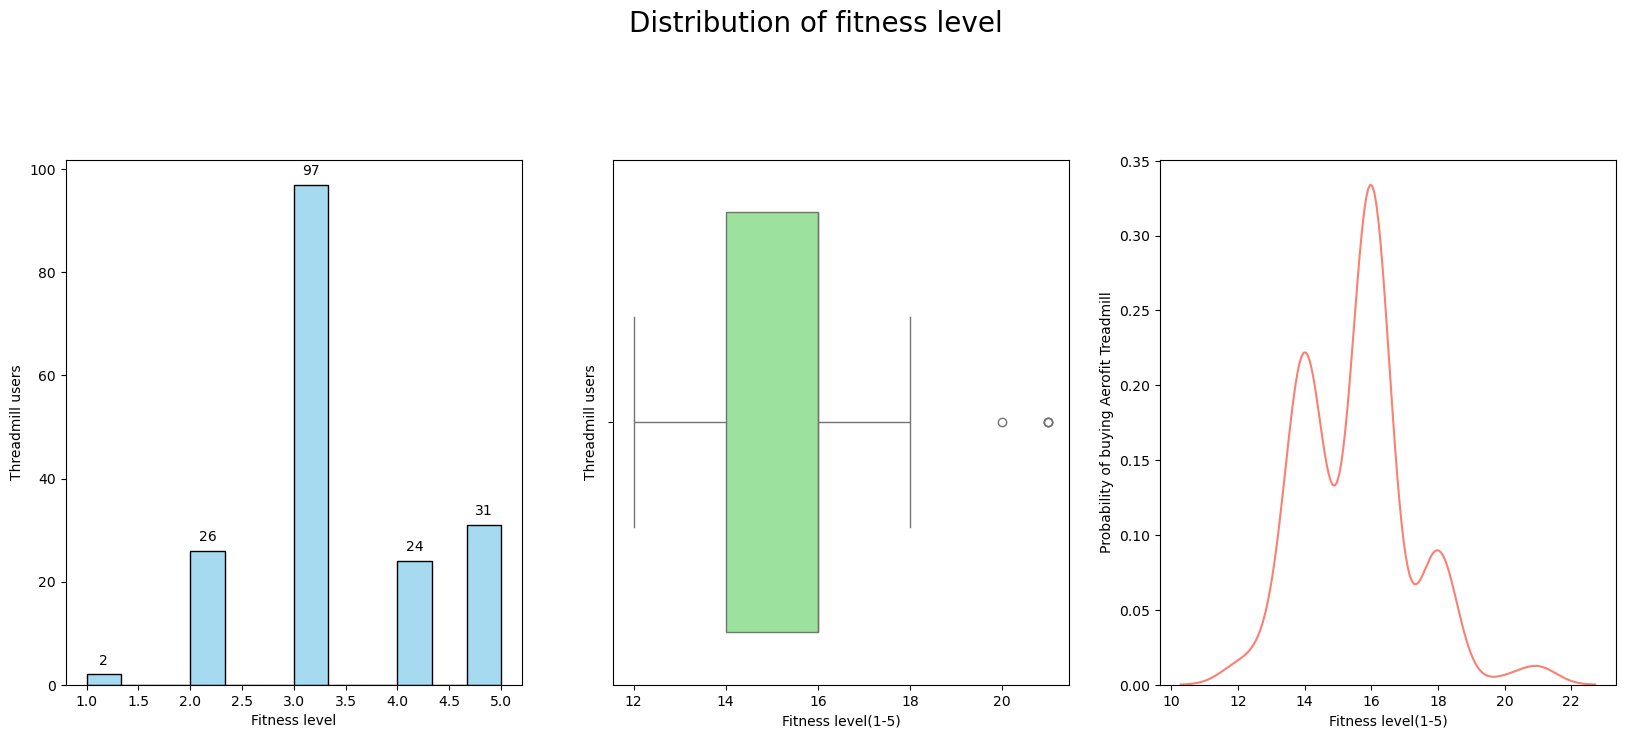

In [82]:
plt.figure(figsize=(20, 15))
# First plot: Histogram with a specific color
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='Fitness', color='skyblue')
plt.xlabel("Fitness level")
plt.ylabel("Threadmill users")
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:  # Only annotate if the height is greater than 0
        plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                           xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
# Second plot: Boxplot with a different color
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Education', color='lightgreen')
plt.xlabel("Fitness level(1-5)")
plt.ylabel("Threadmill users")
# Third plot: Another Histogram with a different color
plt.subplot(2, 3, 3)
sns.kdeplot(data=df, x='Education', color='salmon')
plt.xlabel("Fitness level(1-5)")
plt.ylabel("Probability of buying Aerofit Treadmill")
plt.suptitle("Distribution of fitness level", fontsize=20)
plt.show()

**Insight:**
* Majority of Aerofit customers posses fitness level 3,highly likelihood of them

**Distribution of usage:**

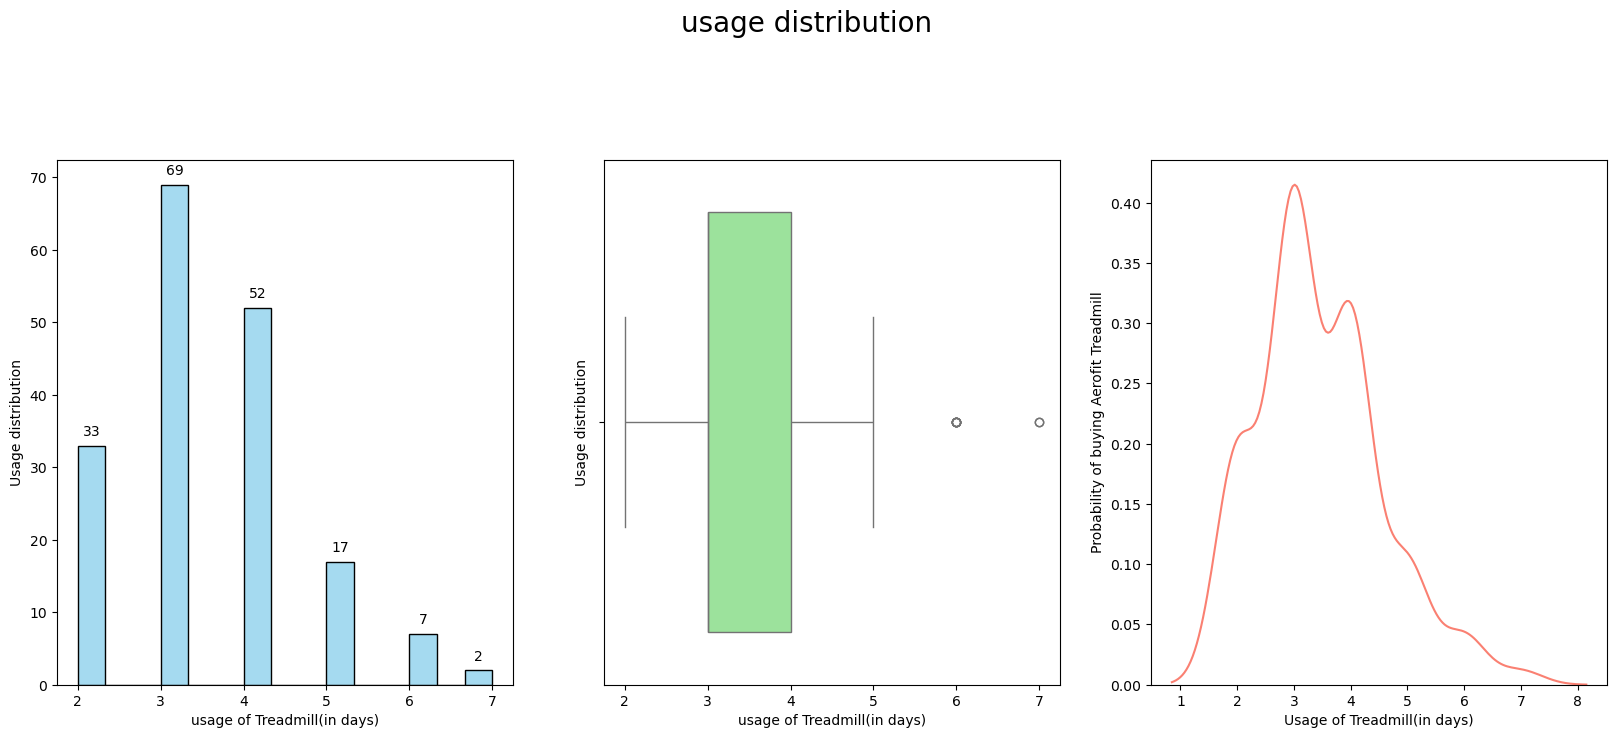

In [85]:
plt.figure(figsize=(20, 15))
# First plot: Histogram with a specific color
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='Usage', color='skyblue')
plt.xlabel("usage of Treadmill(in days)")
plt.ylabel("Usage distribution")
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:  # Only annotate if the height is greater than 0
        plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                           xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
# Second plot: Boxplot with a different color
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Usage', color='lightgreen')
plt.xlabel("usage of Treadmill(in days)")
plt.ylabel("Usage distribution")
# Third plot: Another Histogram with a different color
plt.subplot(2, 3, 3)
sns.kdeplot(data=df, x='Usage', color='salmon')
plt.xlabel("Usage of Treadmill(in days)")
plt.ylabel("Probability of buying Aerofit Treadmill")
plt.suptitle("usage distribution", fontsize=20)
plt.show()

**Insights:**
* The majority of customers use three times a week, indicating a higher probability of them purchasing treadmill from Aerofit

**Distribution of miles:**

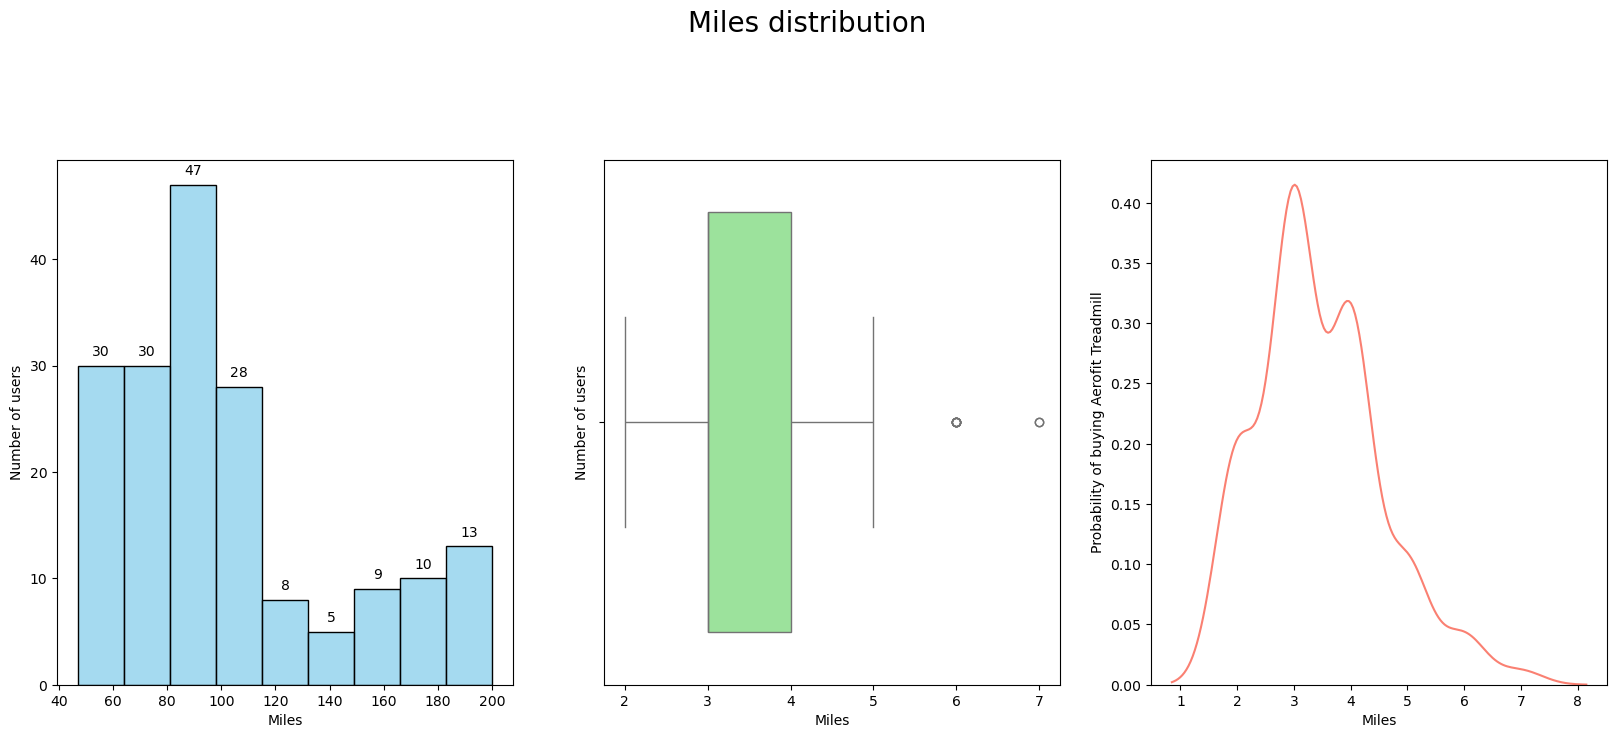

In [88]:
plt.figure(figsize=(20, 15))
# First plot: Histogram with a specific color
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='Miles', color='skyblue')
plt.xlabel("Miles")
plt.ylabel("Number of users")
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:  # Only annotate if the height is greater than 0
        plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                           xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
# Second plot: Boxplot with a different color
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Usage', color='lightgreen')
plt.xlabel("Miles")
plt.ylabel("Number of users")
# Third plot: Another Histogram with a different color
plt.subplot(2, 3, 3)
sns.kdeplot(data=df, x='Usage', color='salmon')
plt.xlabel("Miles")
plt.ylabel("Probability of buying Aerofit Treadmill")
plt.suptitle("Miles distribution", fontsize=20)
plt.show()

**Insights:**
1. Average(200 -250) miles per week,tend to prefer jogging over using Aerofit treadmills
2. Customers who run 90-100 miles per week,tend to prefer jogging than Aerofit treadmills

# **Visual Analysis - Bivariate**

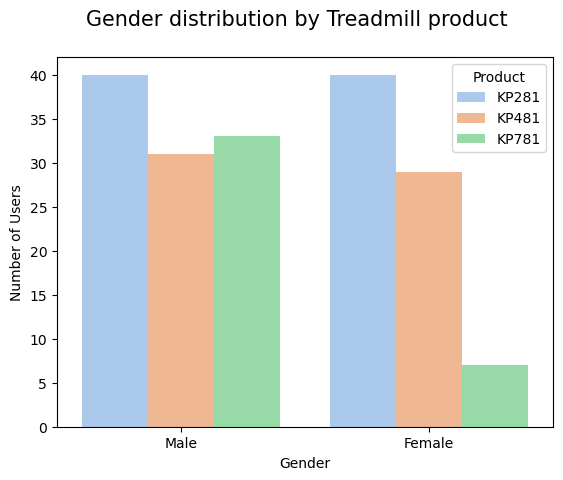

In [91]:
sns.countplot(data = df,x = 'Gender',hue = 'Product',palette = 'pastel')
plt.xlabel("Gender")
plt.ylabel("Number of Users")
plt.suptitle("Gender distribution by Treadmill product",fontsize = 15)
plt.show()

**Gender across each treadmill**

In [93]:
gen = df.groupby(['Product','Gender']).size().unstack()
gen

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


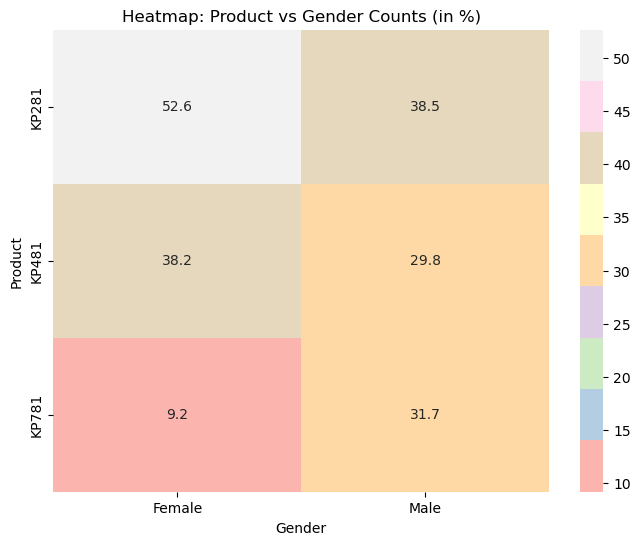

In [94]:
# Calculate the column-wise total for each gender (Female and Male)
total = gen.sum(axis=0)

# Calculate percentages by dividing each value by the total for the column (gender)
gen_percentage = gen.div(total, axis=1) * 100

# Create a heatmap using the percentage data
plt.figure(figsize=(8, 6))
sns.heatmap(gen_percentage, annot=True, cmap="Pastel1", fmt='.1f', cbar=True)

plt.title("Heatmap: Product vs Gender Counts (in %)")
plt.show()


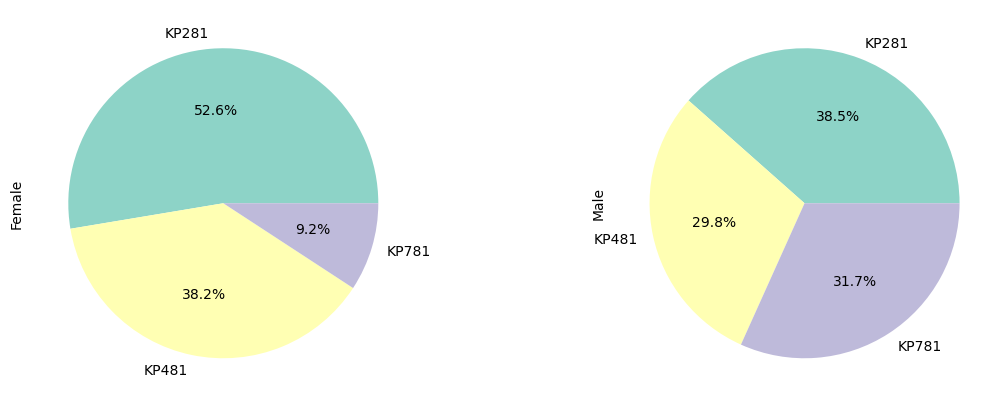

In [95]:
palette = sns.color_palette("Set3", len(gen))
# Plotting pie charts with palette and suptitle
gen.plot(kind='pie',
         subplots=True, 
         figsize=(20, 10), 
         autopct='%1.1f%%', 
         layout=(1, len(gen)),
         legend=False, 
         colors=palette,
         labeldistance=1.1)  # Adjust labeldistance to place labels outside the pie charts
# Adjust the space between the pie charts
plt.subplots_adjust(wspace=0.5)  # Adjust this value for more or less space
plt.show()

**Insights:**
1. KP281 has an equal distribution among male and female customers
2. Among Female customers, 52.6% prefer KP281 , 38.2% prefer KP481, and 9.2% favor KP781
3. Among Male customers,38,5% prefer KP281,31.7% prefer KP781 and 29.8% favor KP481

**Martial status of customers who purchased treadmill**

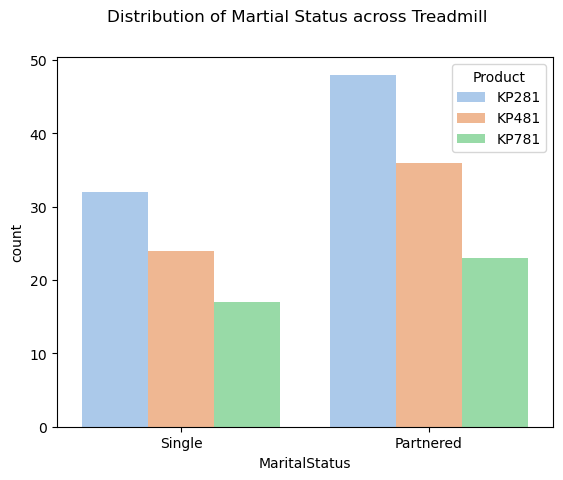

In [98]:
sns.countplot(data = df, x='MaritalStatus', hue='Product', palette='pastel')
plt.suptitle("Distribution of Martial Status across Treadmill")
plt.show()

In [99]:
martial = df.groupby(['Product','MaritalStatus']).size().unstack()
martial

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


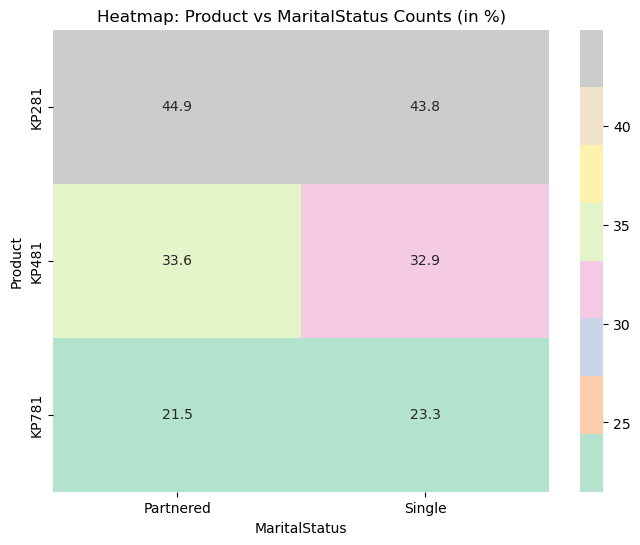

In [100]:
# Calculate the column-wise total for each gender (Female and Male)
total = martial.sum(axis=0)

# Calculate percentages by dividing each value by the total for the column (gender)
Marital_percentage = martial.div(total, axis=1) * 100

# Create a heatmap using the percentage data
plt.figure(figsize=(8, 6))
sns.heatmap(Marital_percentage, annot=True, cmap="Pastel2", fmt='.1f', cbar=True)

plt.title("Heatmap: Product vs MaritalStatus Counts (in %)")
plt.show()

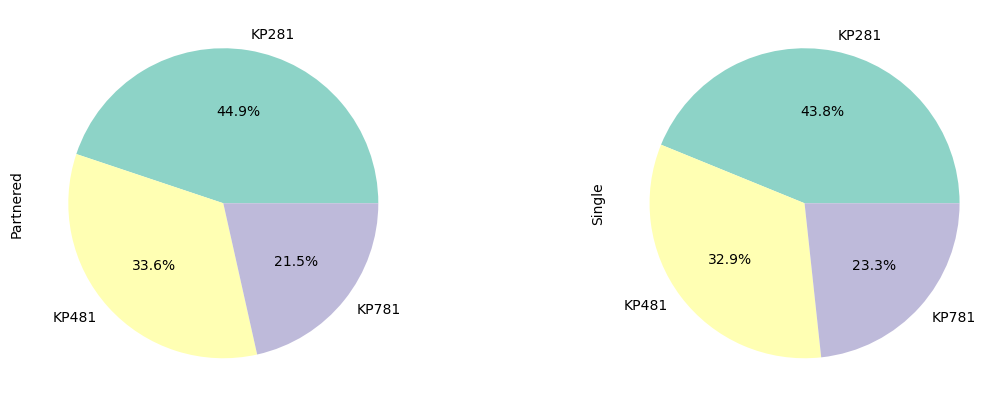

In [101]:
palette = sns.color_palette("Set3", len(gen))
# Plotting pie charts with palette and suptitle
martial.plot(kind='pie',
         subplots=True, 
         figsize=(20, 10), 
         autopct='%1.1f%%', 
         layout=(1, len(gen)),
         legend=False, 
         colors=palette,
         labeldistance=1.1)  # Adjust labeldistance to place labels outside the pie charts
# Adjust the space between the pie charts
plt.subplots_adjust(wspace=0.5)  # Adjust this value for more or less space
plt.show()

**Insights:**
1. Among married customers,the purchase distribution for Aerofit treadmill is as follows:
   44.9% prefer KP281
   33.6% prefer KP481
   21.5% prefer KP781
2. Among single customers, the purchase distribution for Aerofit treadmill is as follows:
   43.8% prefer KP281
   32.9% prefer KP481
   23.3% prefer KP781

**Age group of customers for each treadmill**

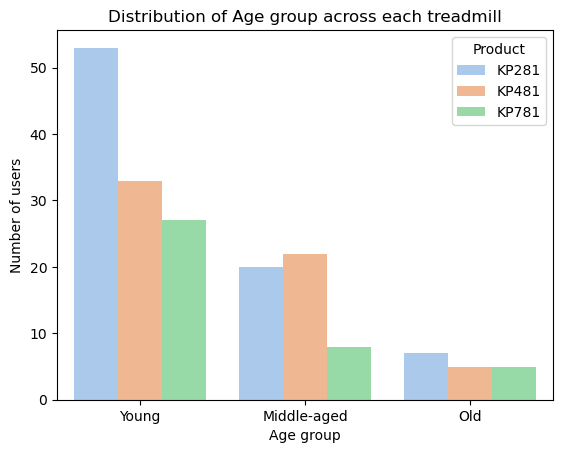

In [104]:
sns.countplot(df,x = 'age_group',hue = 'Product',palette = 'pastel')
plt.title('Distribution of Age group across each treadmill')
plt.xlabel("Age group")
plt.ylabel('Number of users')
plt.show()

In [105]:
agegroup = df.groupby(['age_group','Product']).size().unstack()
agegroup

Product,KP281,KP481,KP781
age_group,,,
Young,53,33,27
Middle-aged,20,22,8
Old,7,5,5


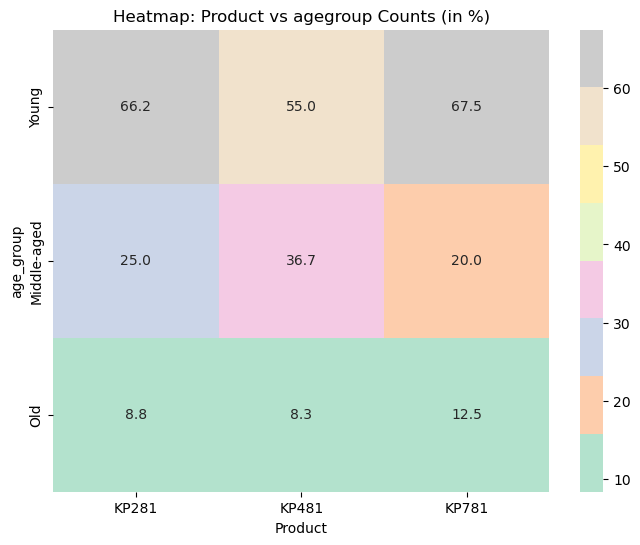

In [106]:
# Calculate the column-wise total for each gender (Female and Male)
total = agegroup.sum(axis=0)

# Calculate percentages by dividing each value by the total for the column (gender)
agegroup_percentage = agegroup.div(total, axis=1) * 100

# Create a heatmap using the percentage data
plt.figure(figsize=(8, 6))
sns.heatmap(agegroup_percentage, annot=True, cmap="Pastel2", fmt='.1f', cbar=True)

plt.title("Heatmap: Product vs agegroup Counts (in %)")
plt.show()

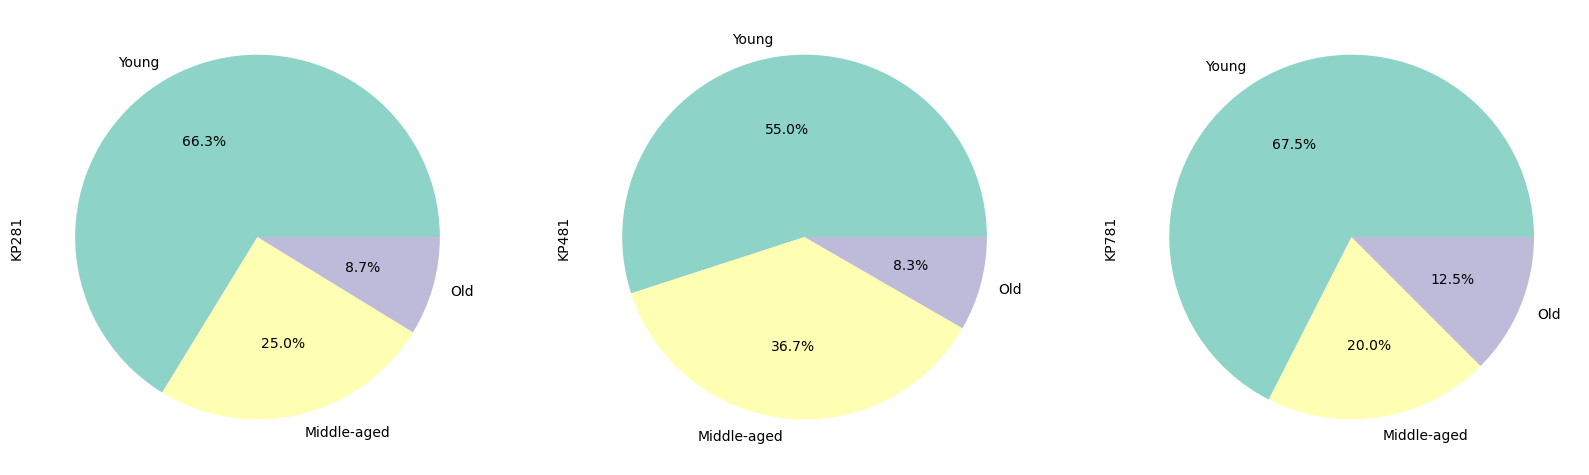

In [107]:
palette = sns.color_palette("Set3", len(gen))
# Plotting pie charts with palette and suptitle
agegroup.plot(kind='pie',
         subplots=True, 
         figsize=(20, 10), 
         autopct='%1.1f%%', 
         layout=(1, len(gen)),
         legend=False, 
         colors=palette,
         labeldistance=1.1)  # Adjust labeldistance to place labels outside the pie charts
# Adjust the space between the pie charts
plt.show()

Age groups:
1. 18-29: Young
2. 30-39: Middle-aged
3. 40-50: Old
4. KP281:
   Young: 66.3%
   Middle-aged: 25.0%
   Old: 8.7%
5. KP481:
   Young: 55.0%
   Middle-aged: 36.7%
   Old: 8.3%
6. KP781:
   Young: 67.5%
   Middle-aged: 20.0%
   Old: 12.5%

**Income group of customers who purchased Aerofit Treadmill**

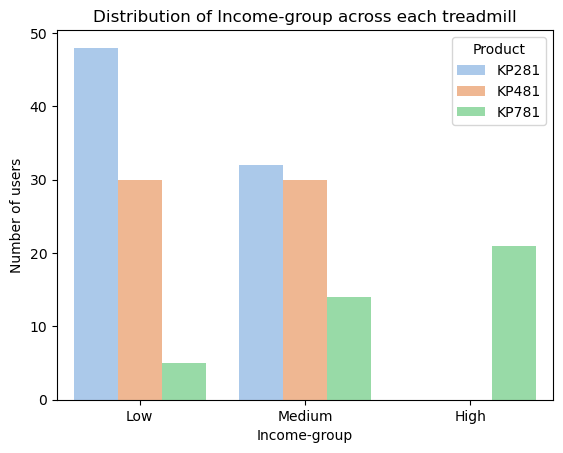

In [110]:
sns.countplot(df,x = 'Income-group',hue = 'Product',palette = 'pastel')
plt.title('Distribution of Income-group across each treadmill')
plt.xlabel("Income-group")
plt.ylabel('Number of users')
plt.show()

In [111]:
income = df.groupby(['Income-group','Product']).size().unstack()
income

Product,KP281,KP481,KP781
Income-group,,,
Low,48,30,5
Medium,32,30,14
High,0,0,21


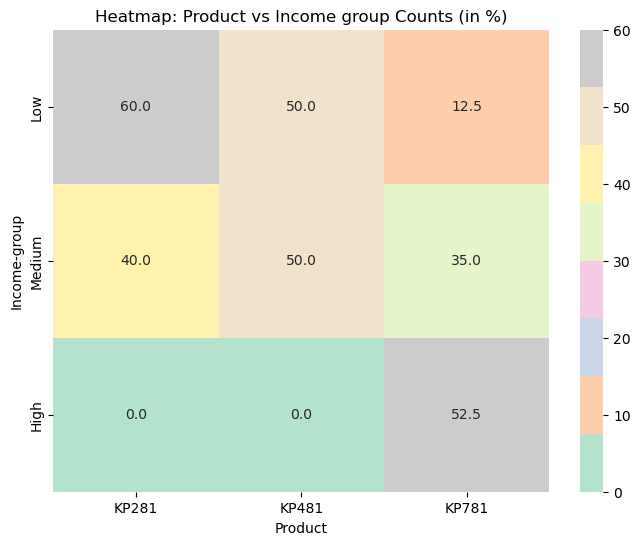

In [112]:
# Calculate the column-wise total for each gender (Female and Male)
total = income.sum(axis=0)

# Calculate percentages by dividing each value by the total for the column (gender)
in_percentage = income.div(total, axis=1) * 100

# Create a heatmap using the percentage data
plt.figure(figsize=(8, 6))
sns.heatmap(in_percentage, annot=True, cmap="Pastel2", fmt='.1f', cbar=True)

plt.title("Heatmap: Product vs Income group Counts (in %)")
plt.show()

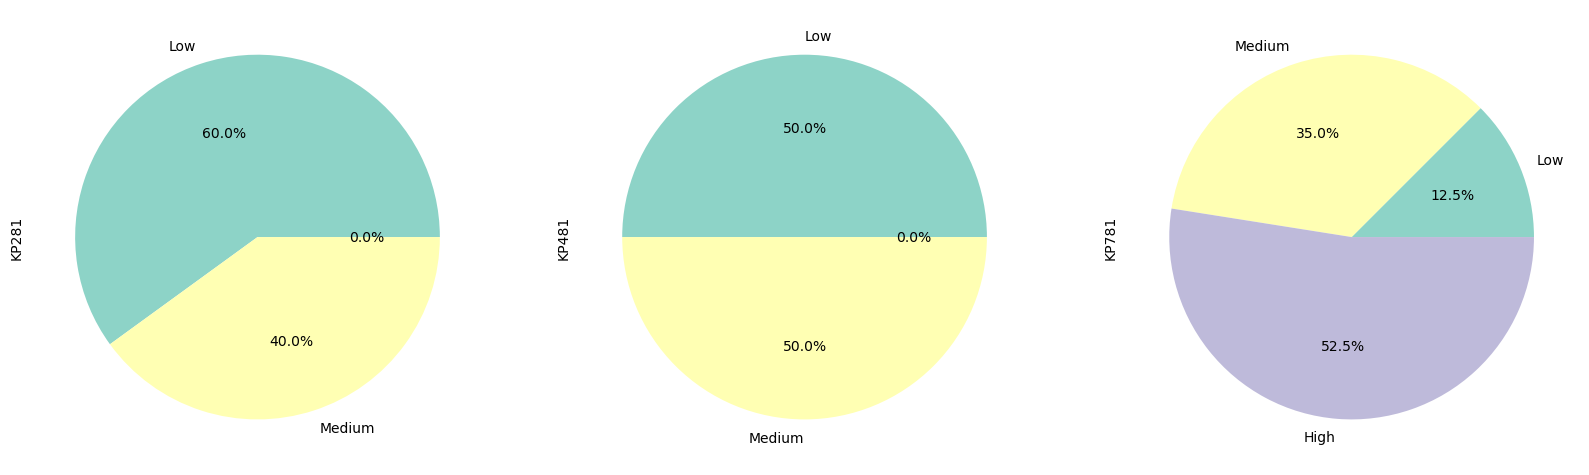

In [113]:
palette = sns.color_palette("Set3", len(gen))
# Plotting pie charts with palette and suptitle
income.plot(kind='pie',
         subplots=True, 
         figsize=(20, 10), 
         autopct='%1.1f%%', 
         layout=(1, len(gen)),
         legend=False, 
         colors=palette,
         labeldistance=1.1)  # Adjust labeldistance to place labels outside the pie charts
# Adjust the space between the pie charts
plt.show()

**Insights:**
1. Low: 29000 to 50000
2. Middle: 51000 to 75000
3. High: Above 76000
4. Mostly , KP281 and KP481 was brought by a Low and Middle income groups
5. KP781: Low -> 12.5% ,Middle -> 35%, High -> 52.5%

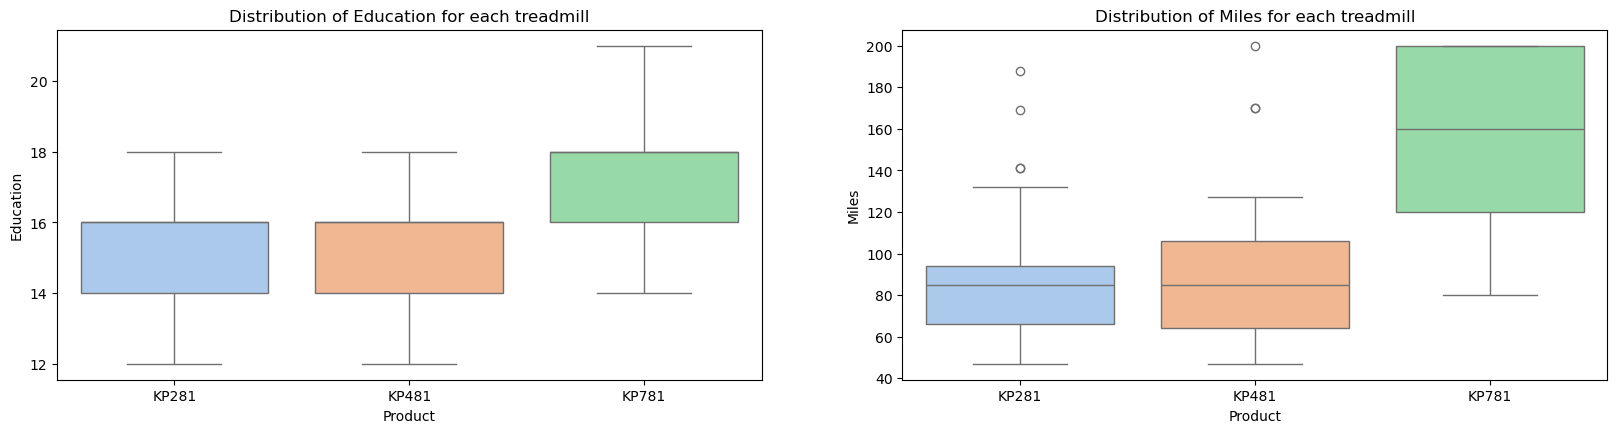

In [115]:
col = ['Education','Miles']
plt.figure(figsize = (20,10))
for i,c in enumerate(col,1):
    plt.subplot(2,2,i)
    sns.boxplot(data = df, x = 'Product',y = c ,palette = 'pastel')
    plt.title(f'Distribution of {c} for each treadmill')
plt.show()

**Insights:**
1. KP281 and KP481 are customers with 14 - 16 years of education and 16 -18 years of education prefer KP781
2. KP281 treadmill customers prefer to run 60-100 miles per week.
3. KP481 treadmill customers prefer to run 60-120 miles per week.
4. KP781 treadmill customers prefer to run 120-200 miles per week.

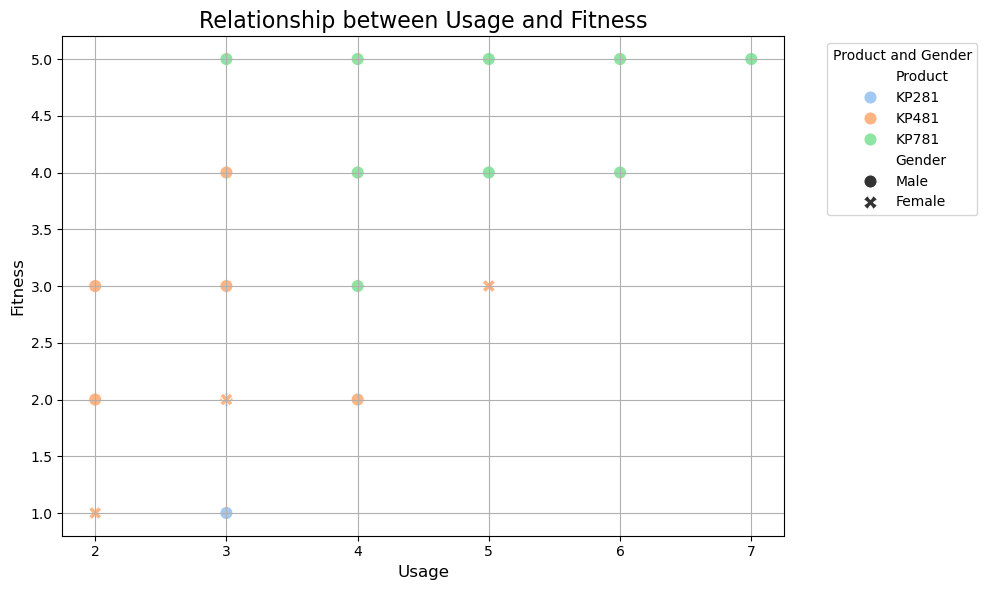

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Usage', y='Fitness', hue='Product', palette='pastel', style='Gender',s = 90)
# Add titles and labels
plt.title('Relationship between Usage and Fitness', fontsize=16)
plt.xlabel('Usage', fontsize=12)
plt.ylabel('Fitness', fontsize=12)
# Show the plot
plt.legend(title='Product and Gender', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend placement
plt.grid(True)
plt.tight_layout()  # To make sure labels don't overlap
plt.show()

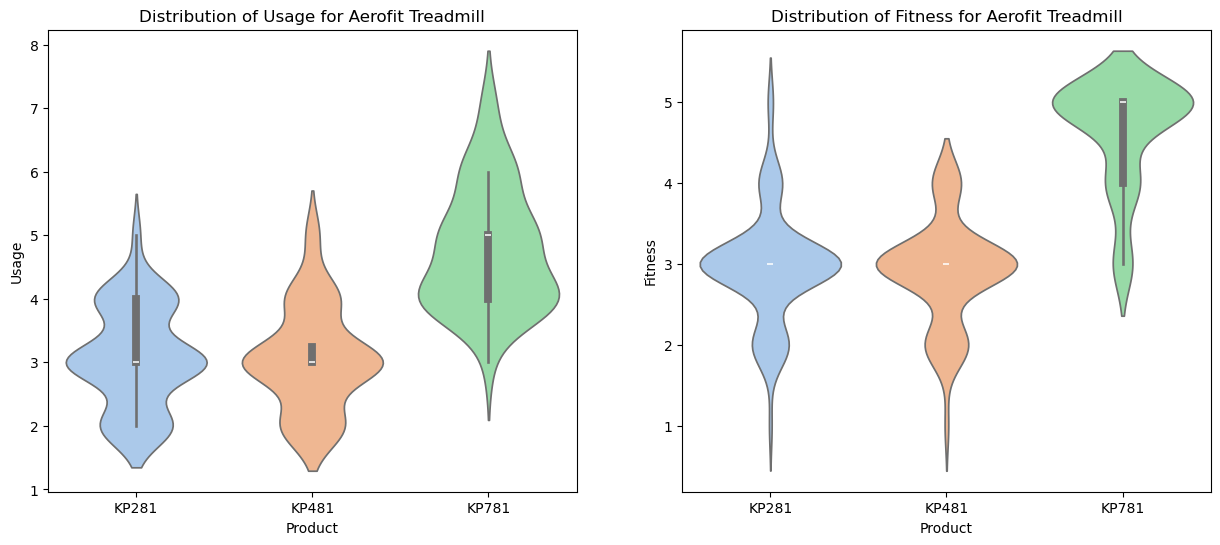

In [118]:
# List of variables to visualize
variables = ['Usage', 'Fitness']

plt.figure(figsize=(15, 6))

for i, var in enumerate(variables, 1):
    plt.subplot(1, 2, i)
    sns.violinplot(data=df, x='Product', y=var, palette='pastel')
    plt.title(f'Distribution of {var} for Aerofit Treadmill')

plt.show()

**Insights:**
1. KP281 and KP481 customers use treadmills 3 times a week
2. KP781 customers use treadmills 4-5 times a week
3. KP281 and KP481 prefer customers with fitness level 3
4. KP781 prefer customers with fitness level 5 (most advanced treadmill)

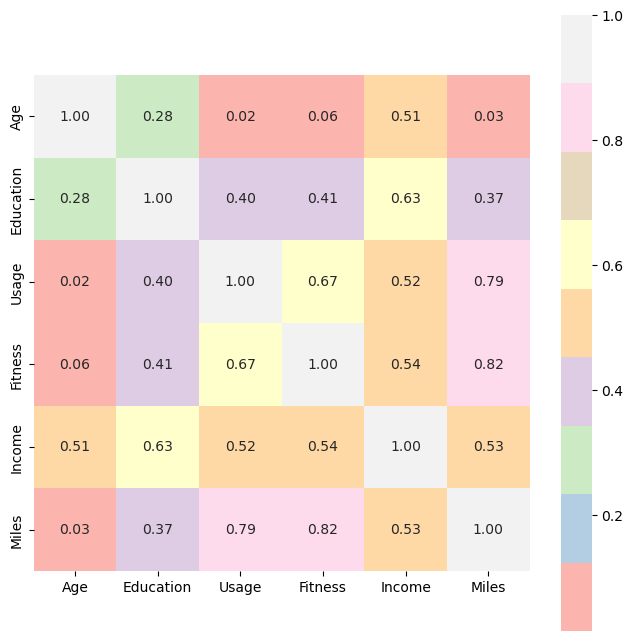

In [120]:
# Select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=['number'])
# Compute the correlation matrix
corr_matrix = df_numeric.corr()
# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Pastel1', fmt='.2f',square = True)
plt.show()

**Insights:**
1. **Age and education:** Positive correlation of approximately 0.28.This indicates that customers age increases,their education level tends to be higher
2. **Age and Income:** Moderate positive correlation of approximately 0.51.This indicates that customers age increases,their income level tends to be higher
3. **Education and Income:** Relatively strong positive correlation of approximately 0.63.This indicates that Education increases,their income level tends to be higher
4. **Usage and Fitness:** Strong positive correlation of approximately 0.67.The customers who plan to use treadmill more frequently tend to have higher fitness levels
5. **Fitness and Miles:** Strong positive correlation of approximately 0.79.This indicates that higher fitness level also expect to jog/walk miles per week
6. **Age and Fitness:** Weak positive correlation of approximately 0.06.
7. **Age and Miles:** weak positive correlation of approximately 0.04.
8. **Age and Usage:** weak positive correlation of approximately 0.02

# **Visual Analysis - Multivariate**

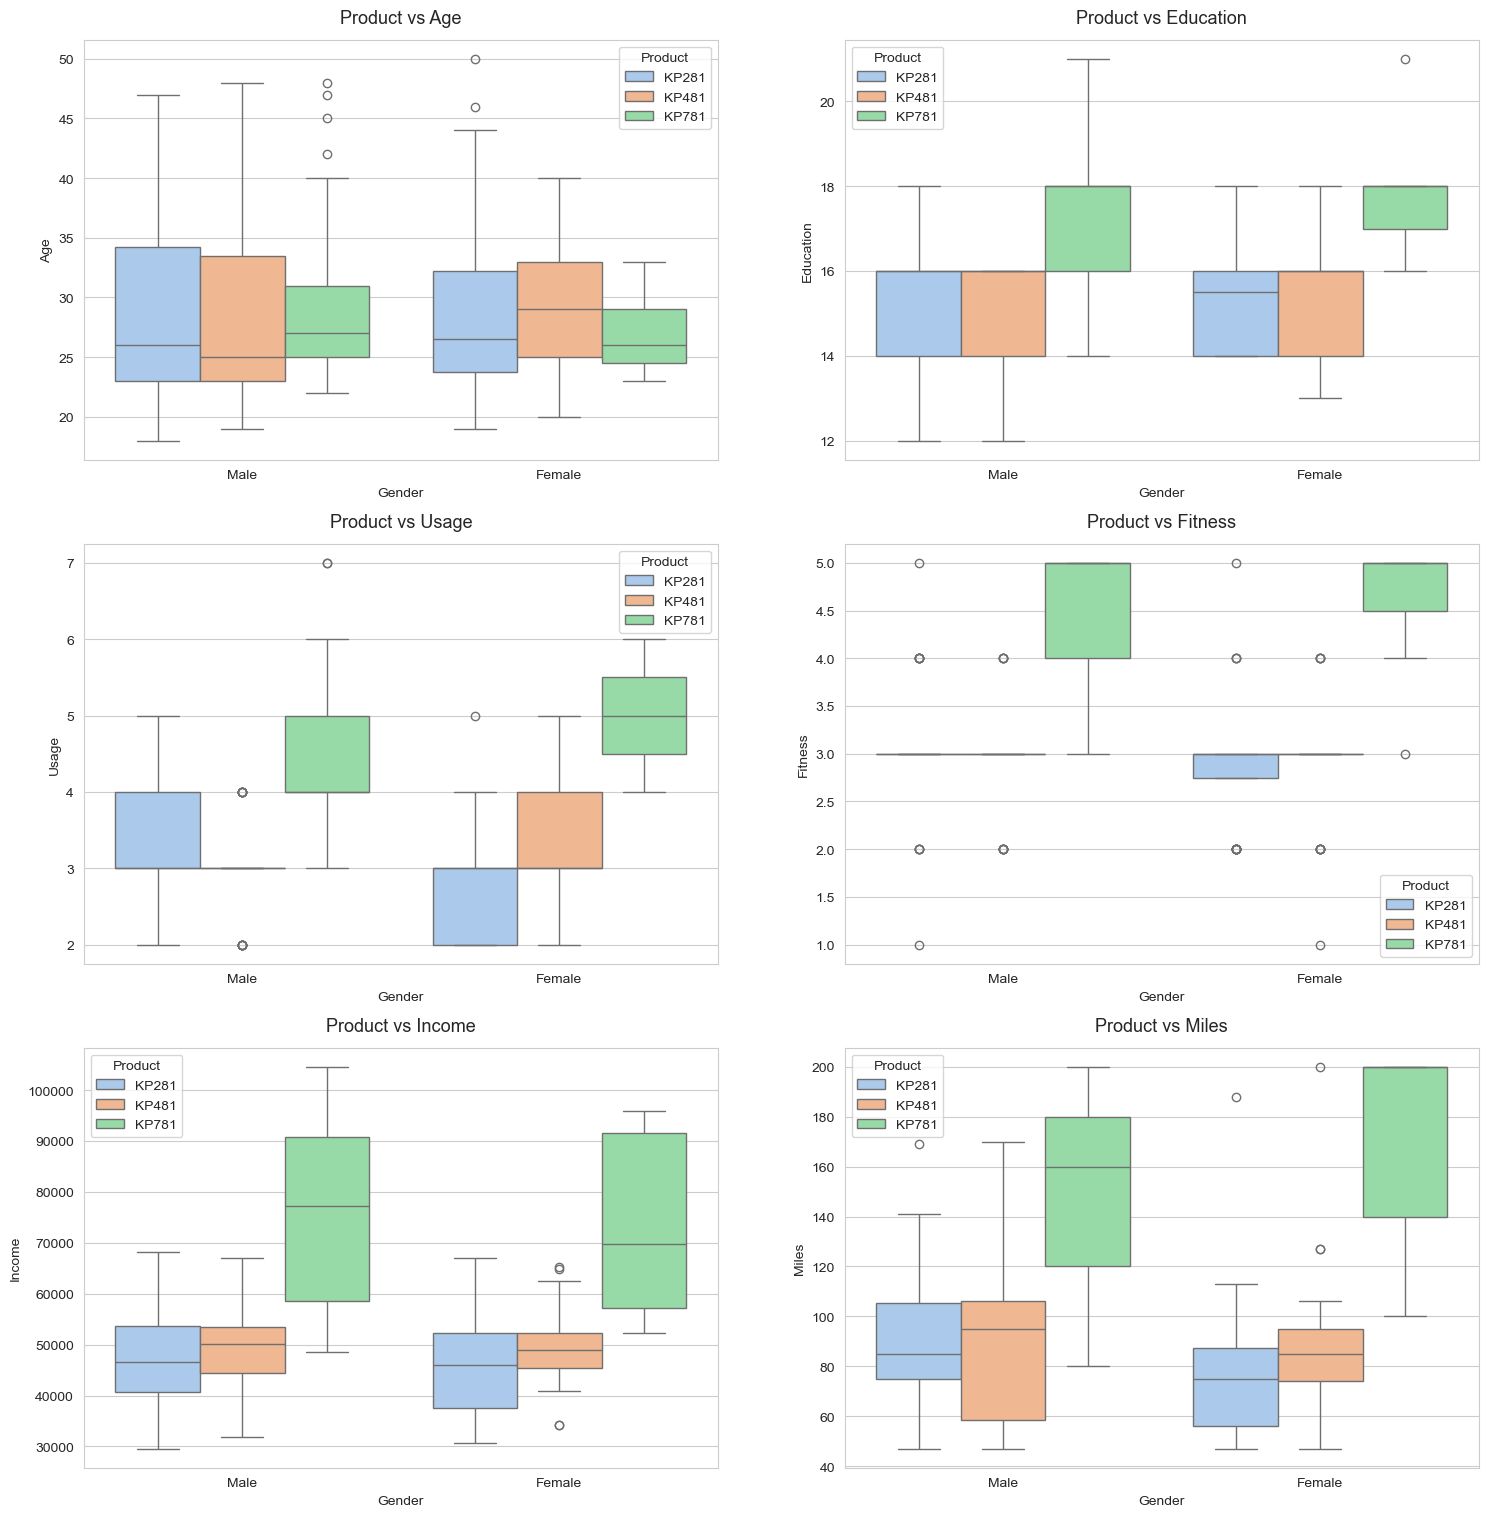

In [123]:
var = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style('whitegrid')
# Create subplots with 3 rows and 2 columns
fig, axis = plt.subplots(3, 2, figsize=(18, 12))
# Adjust the layout to avoid overlap
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=var[count], hue='Product', ax=axis[i, j], palette='pastel')
        axis[i, j].set_title(f"Product vs {var[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

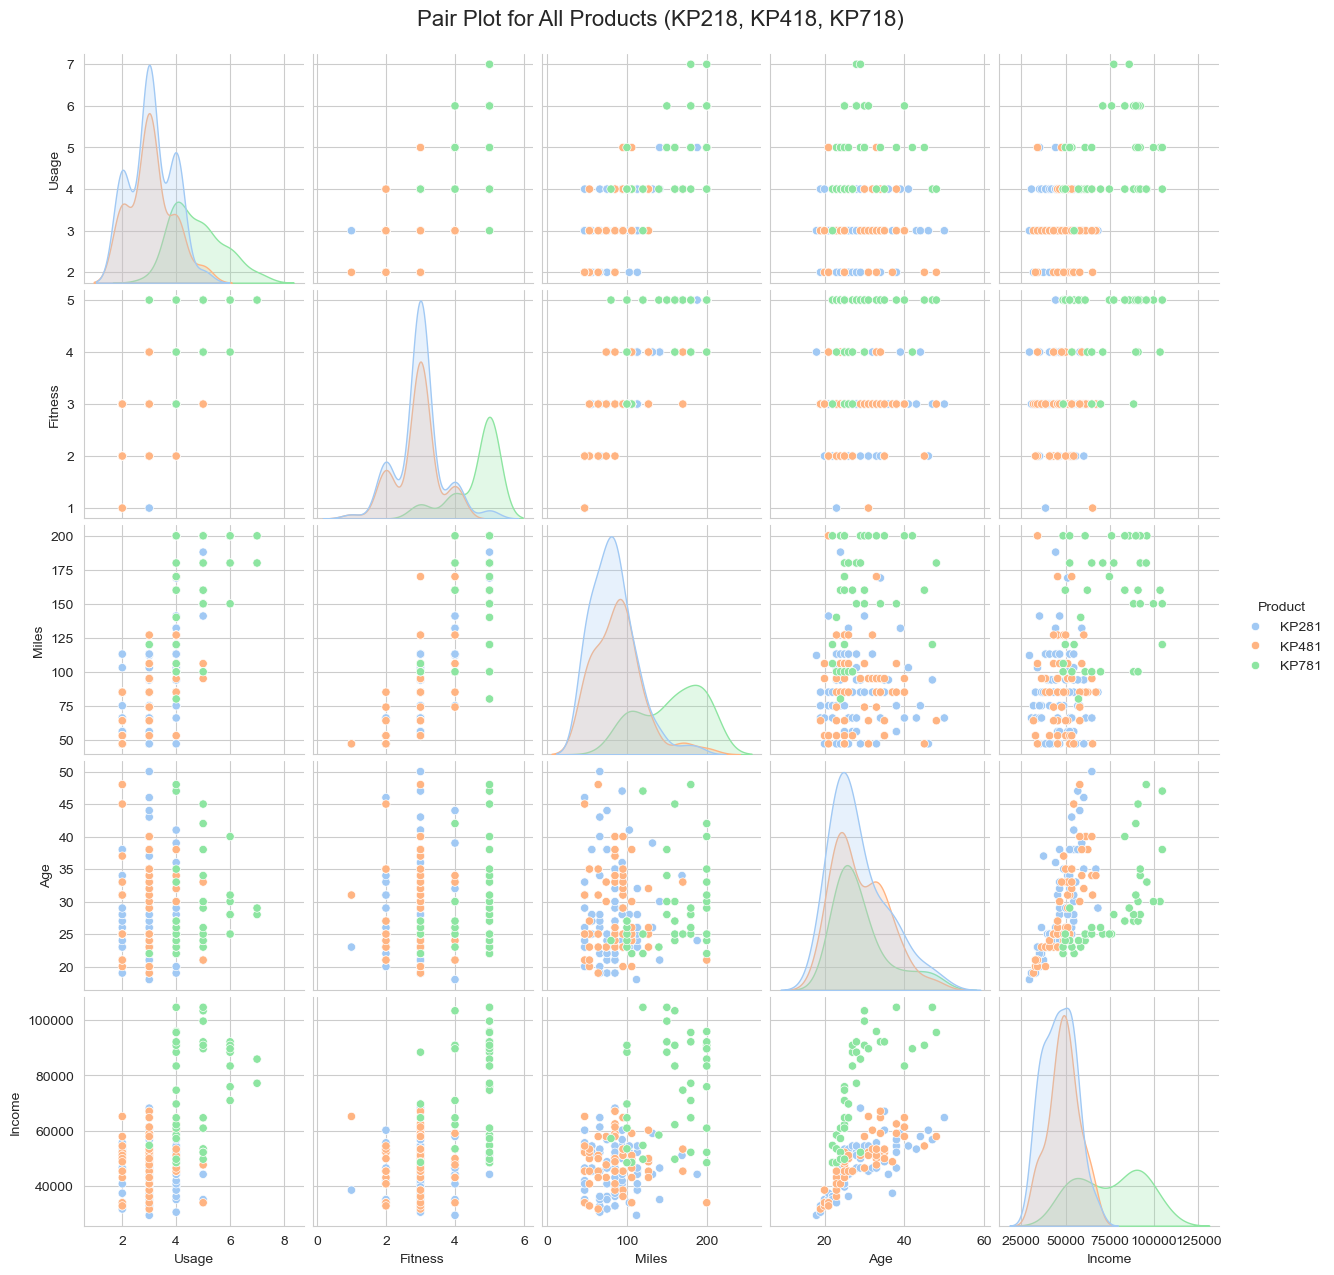

In [124]:
continuous_vars = ['Usage', 'Fitness', 'Miles', 'Age', 'Income'] 
sns.pairplot(df[continuous_vars + ['Product']], hue='Product', palette='pastel')
plt.suptitle('Pair Plot for All Products (KP218, KP418, KP718)', fontsize=16, y=1.02)
plt.show()

**Insights:**
**Product Vs Age:**
1. Customers who purchased KP281 and KP481 are having same age median value
2. Customers whose age lies between 25-30,are more likely to buy KP781 product
**Product Vs Education:**
1. Customers whose education is less than 16 have equal chances of purchasing KP281 and KP481
2. Customers whose education is greater than 16 have more chances of purchasing KP781
**Product Vs Usage:**
1. Customers who are planning to use treadmill greater than 4 times a week,purchase KP781
2. The other customers purchase KP281 or KP481
**Product Vs Fitness:**
1. Fitness greater than or equal to 3,posses higher KP781
**Product Vs Income:**
1. Mostly , KP281 and KP481 was brought by a Low and Middle income groups
2. The high income groups brought KP781
**Product Vs Miles:**
1. The customers use KP281 and KP481 product treadmills 3 times a week
2. KP781 customers use treadmills 4-5 times a week

# **Conditional and Marginal Probabilities**

**Impact of gender on purchasing the treadmill**

In [128]:
crosstab_result = (pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True, margins_name='Total') / 
                   pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True, margins_name='Total').loc['Total', 'Total']).round(2)
crosstab_result

Gender,Female,Male,Total
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
Total,0.42,0.58,1.00


**Marginal Probablities**
 * p(KP281) = 0.44
 * p(KP481) = 0.33
 * p(KP781) = 0.22
 * p(Female) = 0.42
 * p(Male) = 0.58

**Conditional Probabilities:**
 * p(KP281|Female) = 0.22
 * P(KP281|Male) = 0.22
 * p(KP481|Female) = 0.16
 * P(KP481|Male) = 0.17
 * p(KP781|Female) = 0.04
 * P(KP781|Male) = 0.18

**Impact of Martialstatus on purchasing the treadmill**

In [131]:
crosstab_result = (pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], margins=True, margins_name='Total') / 
                   pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], margins=True, margins_name='Total').loc['Total', 'Total']).round(2)
crosstab_result

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
Total,0.59,0.41,1.00


**Marginal Probablities**
 * p(KP281) = 0.44
 * p(KP481) = 0.33
 * p(KP781) = 0.22
 * p(Partnered) = 0.59
 * p(Single) = 0.41

**Conditional Probabilities:**
 * p(KP281|Partnered) = 0.27
 * P(KP281|Single) = 0.18
 * p(KP481|Partnered) = 0.20
 * P(KP481|Single) = 0.13
 * p(KP781|Partnered) = 0.13
 * P(KP781|Single) = 0.09

**Impact of age group on purchasing the treadmill**

In [134]:
crosstab_result = (pd.crosstab(index=df['Product'], columns=df['age_group'], margins=True, margins_name='Total') / 
                   pd.crosstab(index=df['Product'], columns=df['age_group'], margins=True, margins_name='Total').loc['Total', 'Total']).round(2)
crosstab_result

age_group,Young,Middle-aged,Old,Total
Product,,,,
KP281,0.29,0.11,0.04,0.44
KP481,0.18,0.12,0.03,0.33
KP781,0.15,0.04,0.03,0.22
Total,0.63,0.28,0.09,1.00


**Marginal Probablities**
 * p(KP281) = 0.44
 * p(KP481) = 0.33
 * p(KP781) = 0.22
 * p(Young) = 0.63
 * p(Middle-aged) = 0.28
 * p(Old) = 0.09

**Conditional Probabilities:**
 * p(KP281|Young) = 0.29
 * P(KP281|Middle-age) = 0.11
 * p(KP281|Old) = 0.04
 * p(KP481|Young) = 0.18
 * P(KP481|Middle-age) = 0.12
 * p(KP481|Old) = 0.03
 * p(KP781|Young) = 0.15
 * P(KP781|Middle-age) = 0.04
 * p(KP781|Old) = 0.03

**Impact of income group on purchasing the treadmill**

In [137]:
print(" ************************************* Probability of product purchase w.r.t. Weekly Usage**********************************")
crosstab_result = (pd.crosstab(index=df['Product'], columns=df['Income-group'], margins=True, margins_name='Total') / 
                   pd.crosstab(index=df['Product'], columns=df['Income-group'], margins=True, margins_name='Total').loc['Total', 'Total']).round(2)
crosstab_result

 ************************************* Probability of product purchase w.r.t. Weekly Usage**********************************


Income-group,Low,Medium,High,Total
Product,,,,
KP281,0.27,0.18,0.00,0.44
KP481,0.17,0.17,0.00,0.33
KP781,0.03,0.08,0.12,0.22
Total,0.46,0.42,0.12,1.00


**Marginal Probablities**
 * p(KP281) = 0.44
 * p(KP481) = 0.33
 * p(KP781) = 0.22
 * p(Low) = 0.46
 * p(Medium) = 0.42
 * p(High) = 0.12

**Conditional Probabilities:**
 * p(KP281|Low) = 0.27
 * P(KP281|Medium) = 0.18
 * p(KP281|High) = 0.00
 * p(KP481|Low) = 0.17
 * P(KP481|Medium) = 0.17
 * p(KP481|High) = 0.00
 * p(KP781|Low) = 0.03
 * P(KP781|Medium) = 0.08
 * p(KP781|High) = 0.12

**Impact of Education on purchasing the treadmill**

In [140]:
crosstab_result = (pd.crosstab(index=df['Product'], columns=df['edu_group'], margins=True, margins_name='Total') / 
                   pd.crosstab(index=df['Product'], columns=df['edu_group'], margins=True, margins_name='Total').loc['Total', 'Total']).round(2)
crosstab_result

edu_group,Primary Education,Secondary Education,Higher Education,Total
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
Total,0.02,0.36,0.62,1.00


**Marginal Probablities**
 * p(KP281) = 0.44
 * p(KP481) = 0.33
 * p(KP781) = 0.22
 * p(Primary Education) = 0.02
 * p(Secondary Education) = 0.36
 * p(Higher Education) = 0.62 	

**Conditional Probabilities:**
 * p(KP281|Primary Education) = 0.01
 * P(KP281|Secondary Education) = 0.21
 * p(KP281|Higher Education) = 0.23
 * p(KP481|Primary Education) = 0.01
 * P(KP481|Secondary Education) = 0.14
 * p(KP481|Higher Education) = 0.18
 * p(KP781|Primary Education) = 0.00
 * P(KP781|Secondary Education) = 0.01
 * p(KP781|Higher Education) = 0.36


**Impact of Fitness on purchasing the treadmill**

In [143]:
crosstab_result = (pd.crosstab(index=df['Product'], columns=df['Fitness'], margins=True, margins_name='Total') / 
                   pd.crosstab(index=df['Product'], columns=df['Fitness'], margins=True, margins_name='Total').loc['Total', 'Total']).round(2)
crosstab_result

Fitness,1,2,3,4,5,Total
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
Total,0.01,0.14,0.54,0.13,0.17,1.00


**Marginal Probablities**
 * p(KP281) = 0.44
 * p(KP481) = 0.33
 * p(KP781) = 0.22
 * p(1) = 0.01
 * p(2) = 0.14
 * p(3) = 0.54
 * p(4) = 0.13
 * p(5) = 0.17

**Conditional Probabilities:**
 * p(KP281|1) = 0.01
 * P(KP281|2) = 0.08
 * p(KP281|3) = 0.30
 * P(KP281|4) = 0.05
 * p(KP281|5) = 0.01
 * p(KP481|1) = 0.01
 * P(KP481|2) = 0.07
 * p(KP481|3) = 0.22
 * P(KP481|4) = 0.04
 * p(KP481|5) = 0.00
 * p(KP781|1) = 0.00
 * P(KP781|2) = 0.00
 * p(KP781|3) = 0.02
 * P(KP781|4) = 0.04
 * p(KP781|5) = 0.16

**Impact of usage on purchasing the treadmill**

In [146]:
crosstab_result = (pd.crosstab(index=df['Product'], columns=df['Usage'], margins=True, margins_name='Total') / 
                   pd.crosstab(index=df['Product'], columns=df['Usage'], margins=True, margins_name='Total').loc['Total', 'Total']).round(2)
crosstab_result

Usage,2,3,4,5,6,7,Total
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
Total,0.18,0.38,0.29,0.09,0.04,0.01,1.00


**Marginal Probablities**
 * p(KP281) = 0.44
 * p(KP481) = 0.33
 * p(KP781) = 0.22
 * p(2) = 0.18
 * p(3) = 0.38
 * p(4) = 0.29
 * p(5) = 0.09
 * p(6) = 0.04
 * p(7) = 0.01

**Conditional Probabilities:**
 * p(KP281|2) = 0.11
 * P(KP281|3) = 0.21
 * p(KP281|4) = 0.12
 * P(KP281|5) = 0.01
 * p(KP281|6) = 0.00
 * p(KP281|7) = 0.00
 * p(KP481|2) = 0.08
 * P(KP481|3) = 0.17
 * p(KP481|4) = 0.07
 * P(KP481|5) = 0.02
 * p(KP481|6) = 0.00
 * p(KP481|7) = 0.00
 * P(KP781|2) = 0.00
 * p(KP781|3) = 0.01
 * P(KP781|4) = 0.10
 * p(KP781|5) = 0.07
 * p(KP781|6) = 0.04
 * p(KP781|7) = 0.01

**Impact of miles on purchasing the treadmill**

In [149]:
crosstab_result = (pd.crosstab(index=df['Product'], columns=df['miles_group'], margins=True, margins_name='Total') / 
                   pd.crosstab(index=df['Product'], columns=df['miles_group'], margins=True, margins_name='Total').loc['Total', 'Total']).round(2)
crosstab_result

miles_group,Light activity,Moderate Activity,Active Lifestyle,Total
Product,,,,
KP281,0.16,0.10,0.16,0.42
KP481,0.10,0.07,0.17,0.34
KP781,0.01,0.00,0.24,0.25
Total,0.26,0.17,0.57,1.00


**Marginal Probablities**
 * p(KP281) = 0.42
 * p(KP481) = 0.34
 * p(KP781) = 0.25
 * p(Light activity) = 0.26
 * p(Moderate Activity) = 0.17
 * p(Active Lifestyle) = 0.57

**Conditional Probabilities:**
 * p(KP281|Light activity) = 0.16
 * P(KP281|Moderate Activity) = 0.10
 * p(KP281|Active Lifestyle) = 0.16
 * p(KP481|Light activity) = 0.10
 * P(KP481|Moderate Activity) = 0.07
 * p(KP481|Active Lifestyle) = 0.17
 * P(KP781|Light activity) = 0.01
 * p(KP781|Moderate Activity) = 0.00
 * P(KP781|Active Lifestyle) = 0.24


# **Customer profiling and recommendation**


Based on the analysis we can see that:
1. Probability of purchase of KP281 = 44%
2. Probability of purchase of KP481 = 33%
3. Probability of purchase of KP781 = 22%

**Customer Profiling for KP281 Treadmill:**
1. This product has equal appeal to both genders (0.22 each), making it a more universally accepted option.
2. This product has a stronger appeal among partnered customers (0.27 vs. 0.18 for singles), suggesting it may be seen as a more family-oriented or relationship-based product.
3. This product has the strongest appeal among young customers (0.29), with much less interest from the middle-aged (0.11) and old (0.04) groups.
4. This product shows significant appeal to both individuals with secondary education (0.21) and higher education (0.23), making it suitable for customers who are more educated.
5. This product is strongly favored by low income customers (0.27) and has a smaller portion of customers in the medium income group (0.18), but it’s not appealing to the high income group.
6. This product is most commonly used at Usage 3 (0.21) and Usage 2 (0.11), suggesting it is a moderately used product, typically in the lower-frequency usage range.
7. This product has a relatively balanced distribution of ratings, with the highest preference at "3" (0.30) and smaller preferences across other ratings.
8. This product is quite well-received by customers across all activity levels, making it suitable for a broad audience. It shows relatively equal preference from "Light activity," "Moderate activity," and "Active lifestyle" groups.

**Customer Profile for KP481 Treadmill:**
1. This product has a slightly higher preference from male customers (0.17 for males vs. 0.16 for females), but the difference is minimal.
2. KP481 has a more balanced appeal between partnered and single customers, though it still tends to be more favored by partnered individuals.
3. This product shows moderate appeal to both young (0.18) and middle-aged (0.12) customers but little interest from older customers (0.03).
4. KP481 has a decent amount of interest from individuals with higher education (0.18) and secondary education (0.14), but very little interest from those with primary education.
5. KP481 also has appeal primarily among low income (0.17) and medium income (0.17) customers, with little to no engagement from the high income group.
6. KP481 also has similar usage patterns, with Usage 3 (0.17) being the most common. It shows somewhat less frequent use compared to KP281 at Usage 2 (0.08) but also less interest in higher usage levels.
7. The ratings are skewed slightly towards "3" (0.22) and "2" (0.07), but generally show a moderate preference across ratings.
8. moderate preference from the "Active lifestyle" group (0.17), but still a noticeable portion of users from the "Light activity" group (0.10).

**Customer Profile for KP781 Treadmill:**

1. This product has a significant gender difference, with males showing more interest than females (0.18 for males vs. 0.04 for females).
2. KP781’s distribution shows less disparity between partnered and single customers, but it still has a slight preference among partnered individuals.
3. KP781 is favored primarily by young customers (0.15), with minimal interest from older groups.
4. KP781 is mostly favored by individuals with higher education (0.21), with negligible interest from those with primary or secondary education.
5. KP781 has a greater appeal among medium income (0.08) and high income (0.12) customers, though its presence in the low income group is minimal (0.03).
6. KP781 is more commonly used at Usage 4 (0.10), Usage 5 (0.07), and Usage 6 (0.04), indicating that customers using this product tend to engage with it more frequently than the other two products.
7. Most ratings for this product are low, with the most significant preference at "5" (0.16). The other ratings are low or negligible.
8. This product is almost entirely favored by the "Active lifestyle" group, with a very minimal presence among those with "Light" or "Moderate" activity.

* **Male Customers:** 58% of total customers are male, indicating that your products, in general, have a stronger male customer base.
* **Female Customers:** 42% of total customers are female, suggesting that while female customers are still a significant portion, they are less engaged overall compared to males.
*  KP281 shows balanced appeal across genders, making it suitable for campaigns that target both male and female customers equally.
* **Active lifestyle:** 57% of total customers fall into the "Active lifestyle" category, which is the dominant segment.
* **Light activity:** 26% of customers are in the "Light activity" group, showing moderate engagement with your products.
* **Moderate activity:** 17% of customers have a "Moderate activity" level, indicating that there is also a solid base of moderately active customers.
* **Partnered Customers:** 59% of total customers are partnered, which is a slightly larger group than single customers.
* **Single Customers:** 41% of customers are single, which still represents a significant portion of the market.
* **Young:** 63% of the total customer base is young, making this the dominant group.
* **Middle-aged:** 28% of customers are middle-aged, indicating a solid market for moderately active adults.
* **Old:** Only 9% of customers are in the "Old" group, so this group is less engaged overall.
* **Higher Education:** 62% of total customers have higher education, making this the dominant group.
* **Secondary Education:** 36% of customers have secondary education, suggesting that this group is still highly engaged with your products.
* **Primary Education:** Only 2% of customers have primary education, so this is a very niche segment
* **Low Income:** 46% of total customers are in the low-income group, which is a significant portion of the market.
* **Medium Income:** 42% of customers are in the medium-income group, making this a nearly equal segment.
* **High Income:** Only 12% of customers fall into the high-income group, indicating that fewer customers from this bracket engage with your products.
* **Usage 3:** 38% of total usage occurs at this frequency, making it the most common usage level.
* **Usage 4:** 29% of total usage occurs here, showing that a significant portion of customers use the product moderately but more frequently.
* **Usage 2:** 18% of customers engage with the product at this lower frequency, showing that a fair number of users engage on a less regular basis.
* **Usage 5 and higher:** The usage drops significantly after Usage 4, with only 9% at Usage 5, 4% at Usage 6, and 1% at Usage 7.




**Key Segmentation for Targeting:**
* **Male-Focused Marketing:** Since males make up a larger portion of the customer base, especially with products like KP781, consider focusing more of your marketing resources on reaching a male audience.
* **Universal Appeal:** KP281 shows balanced appeal across genders, making it suitable for campaigns that target both male and female customers equally.
* **Females:** Although slightly underrepresented, females still account for a substantial portion of the market (42%). Tailored campaigns specifically highlighting benefits relevant to female customers might increase their engagement with products like KP281 and KP481.
* The "Active lifestyle" group is your largest segment, so tailoring your marketing to appeal to active, fitness-focused individuals should be a top priority, especially for products like KP781, which is most favored by this group.
* KP281 and KP481 can appeal to customers in the "Light activity" and "Moderate activity" segments, so offering more casual, easy-to-use product positioning will help reach these consumers.
* This group tends to show more interest in products like KP281 and KP481. If you want to target customers in relationships, focus on the family or couple-oriented marketing angles.
* While they represent 41% of your market, this group is also interested in your products, especially KP281, which has a decent share of single customer interest. Tailoring product messaging to highlight independence and personal fitness benefits might resonate well with this group.
* **Young Customers:** The largest segment by far (63%), making it a key target for all products. Specifically, KP281 and KP781 have strong appeal in this group.
* **Middle-aged Customers:** This group (28%) can be a solid market for KP481, especially if you emphasize wellness and fitness for this age group. Middle-aged individuals might prefer products that help them maintain or improve their active lifestyle.
* **Old Customers:** The smallest segment (9%), so while they represent a niche market, efforts to engage this group should be highly tailored and possibly focus on ease of use, comfort, and health benefits.
* **Higher Education Customers:** The largest segment (62%) and the most engaged with all products, particularly KP281 and KP781. Marketing efforts should focus on this educated, likely more discerning group, highlighting product quality, performance, and advanced features.
* **Secondary Education Customers:** This group (36%) is also quite engaged, especially with KP281. A practical, value-focused marketing approach that emphasizes versatility and accessibility will resonate with this segment.
* **Primary Education Customers:** Given the very small proportion of customers (2%), efforts to target this group should be limited unless there is a specific product designed for simplicity or ease of use for less-educated individuals.
* **Low Income Customers:** This group is your largest segment (46%) and is particularly engaged with KP281 and KP481. Focus on budget-conscious marketing and value-driven messaging to attract these customers.
* **Medium Income Customers:** The second-largest group (42%), this segment is important for KP281, KP481, and also KP781 to some extent. Highlight affordability alongside quality for this group.
*  **High Income Customers:** This group is the smallest (12%) but still important for KP781. Tailor marketing to appeal to their desire for premium, high-quality, and exclusive products.
*  **Moderate Users (Usage 3 and 4):** This group, which makes up 67% of the total, should be the focus for KP281 and KP481. Products can be marketed as ideal for customers who use the products a few times a week or for regular but not daily fitness routines.
*  **Frequent Users (Usage 4, 5, and higher):** KP781 seems to appeal to this group, with its higher usage frequency. It can be marketed as the product of choice for active individuals who use fitness products consistently.


# **Recommendations:**

**KP281**
1. Market KP281 as a balanced product that suits both male and female preferences.
2. Promote KP281 as a versatile option suitable for customers with varying activity levels. It can be marketed as an all-rounder, catering to those who prefer light activity, moderate activity, and those leading an active lifestyle.
3. Focus on its broad appeal. Highlight how it fits into various activity levels, from casual exercisers to more active customers.
4. Focus marketing on both partnered individuals (with messages that appeal to families or couples) and single customers (with messages focused on self-improvement or solo activities).
5. Focus marketing efforts on younger audiences, promoting a modern, active, and trendy lifestyle. Highlight how the product supports youthful energy and activity.
6. Market this product as ideal for educated individuals who appreciate quality and versatility. Highlight features that align with an active, intellectual lifestyle, making it attractive to both secondary and higher education customers.
7.  Market this product as a cost-effective, high-value choice for low to medium-income customers. Emphasize affordability, practicality, and how the product can meet everyday needs.
8.  Market this product as ideal for those with moderate fitness routines, typically used a couple of times a week. Focus on practicality, ease of use, and value for money.
9. Emphasize affordability, value, and functionality.
10. Position the product for individuals who have a moderate level of fitness activity and are looking for a cost-effective option that supports an active lifestyle.
11. Use imagery and messaging that appeals to those balancing fitness with other lifestyle priorities (e.g., young adults, families with medium incomes).   

**KP481**
1. Target both male and female customers, with a slight emphasis on male-centric marketing efforts if needed.
2. Position KP481 as a product that works for customers who have an active lifestyle but also appeal to those who are mildly active (light activity). Emphasizing moderate activity benefits may help reach a wider audience.
3. Stress the versatility of this product. Emphasize how it’s suitable for those transitioning into a more active lifestyle or those who engage in moderate activity.
4. This product could be marketed to both singles and partnered individuals, with a slight emphasis on the "partnered" group for tailored experiences.
5. Market this product as versatile for young and middle-aged adults, emphasizing its ability to support active lifestyles and moderate fitness goals.
6. Position this product as practical and suitable for customers in their middle to late stages of education, focusing on its ability to support moderate physical activity or provide a balanced lifestyle.
7. Position KP481 as a budget-friendly, versatile option for customers in the low to medium-income ranges. You can highlight its value for money and practicality for everyday use.
8.  Similar to KP281, market this product as a versatile, everyday option for moderate usage. Highlight its affordability and suitability for regular fitness enthusiasts.
9.  Highlight practicality and cost-effectiveness in the messaging, aiming at those looking for reliable yet affordable fitness solutions.
10. Promote it as the go-to product for individuals who engage in regular fitness activities without the need for a high-end or daily-use product.
11. Emphasize its durability and versatility, targeting active adults on a budget.

**KP781**
1. KP781 might be suited more to a male demographic, so tailored marketing to male customers would likely increase its appeal.
2. KP781 seems to be targeted specifically at highly active individuals. To increase appeal, consider marketing it as a high-performance product ideal for those with an active or athletic lifestyle. Promoting it as a niche, premium offering could be effective.
3. Tailor your marketing efforts toward fitness enthusiasts and athletes with an "Active lifestyle," as they are the primary group for this product.
4. Market this product as ideal for active individuals, with no need to emphasize marital status. Focus more on the active lifestyle and fitness benefits, ensuring it appeals to both singles and partnered customers equally.
5. This product can be marketed as a premium choice for younger, fitness-oriented individuals, possibly with a focus on high-performance features or exclusive benefits.
6. This product should be marketed as a premium or performance-oriented offering, tailored to individuals with higher education who are looking for specialized or high-quality fitness products
7. Since it has a higher appeal among medium and high-income customers, market it as a premium, high-quality option. Emphasize performance, exclusivity, and advanced features to attract wealthier buyers.
8. Since this product is used more frequently, market it as a premium or high-performance option for dedicated fitness enthusiasts or those who engage in regular physical activity. Emphasize its durability, advanced features, and suitability for frequent use.
9. Position KP781 as a premium, high-quality product designed for frequent users who prioritize performance and durability.
10. Emphasize its advanced features, high-end design, and fitness benefits for serious athletes or fitness enthusiasts.
11. Utilize testimonials and endorsements from fitness influencers to elevate its status as a premium choice.
12. Highlight its superior quality, targeting those with higher disposable income who are looking for specialized equipment that can support regular, high-intensity workouts.